# **CREDIT RISK ANALYSIS AND PREDICTION**

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Import Dataset

In [ ]:
# menampilkan  5 data teratas

df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ukuran dataset

df.shape

(466285, 75)

## Features Description

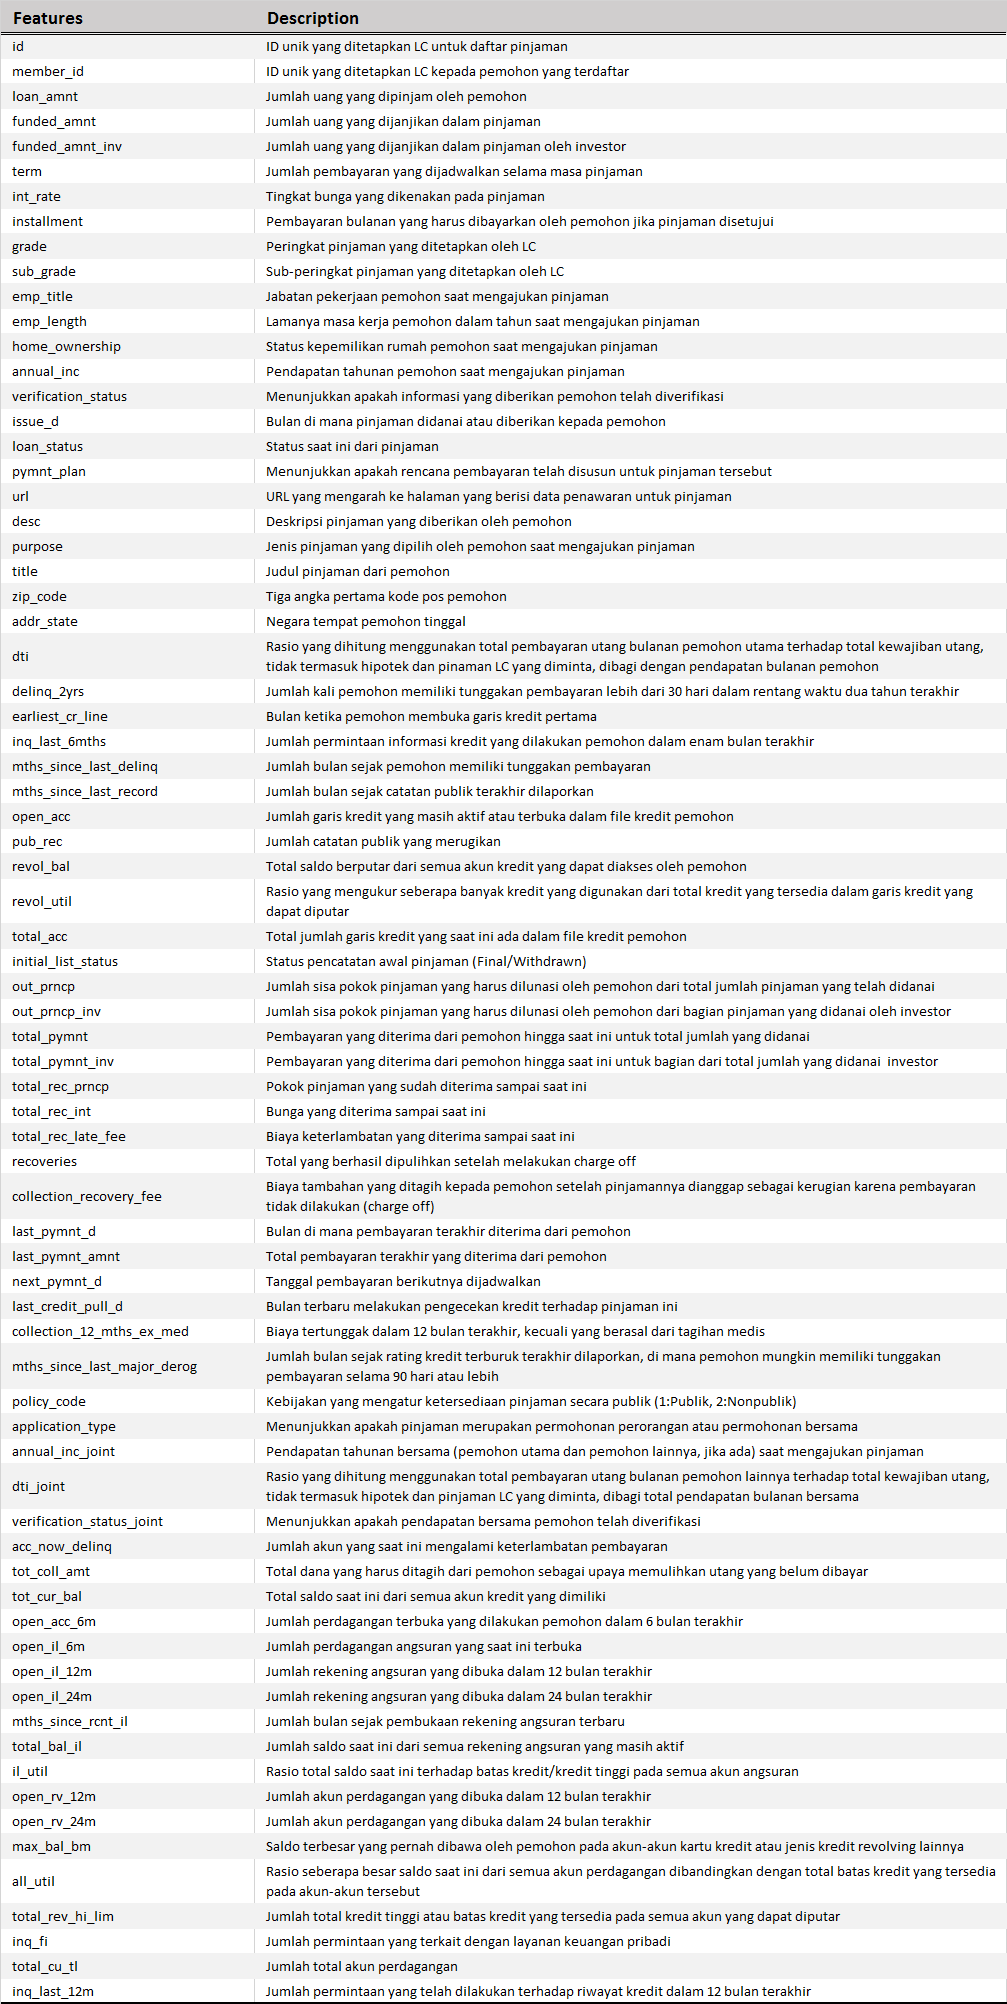

In [ ]:
# melihat informasi umum dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

**Observasi:**
1. df berisi informasi mengenai pinjaman-pinjaman sebelumnya yang pernah diajukan atau dimiliki para pemohon.
2. df memiliki 75 kolom dan 466285 baris.
3. Terdapat banyak *missing values* di beberapa kolom.
4. Beberapa kolom hanya memiliki *null values* saja, sehingga selanjutnya kolom-kolom tersebut akan dihapus.

In [ ]:
# cek kolom yang semua nilainya adalah null

df.columns[df.isnull().all()]

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [ ]:
# drop kolom null

df = df.drop(df.columns[df.isnull().all()], axis=1)

In [ ]:
df.shape

(466285, 58)

# Data Understanding

## Statistical Summary

### Data Type Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

**Observasi:**

Terdapat kesalahan tipe data pada kolom `issue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d` dan `last_credit_pull_d` yang seharusnya memiliki tipe data *datetime*. Sehingga akan diubah tipe data pada kolom-kolom tersebut.

In [ ]:
# mengubah data type dari object ke datetime

df[['issue_d', 'earliest_cr_line',
   'last_pymnt_d', 'next_pymnt_d',
   'last_credit_pull_d']] = df[['issue_d', 'earliest_cr_line',
                                               'last_pymnt_d', 'next_pymnt_d',
                                               'last_credit_pull_d']].apply(pd.to_datetime, format='%b-%y')

In [ ]:
# melihat statistical summary kolom-kolom datetime

df[['issue_d', 'earliest_cr_line',
   'last_pymnt_d', 'next_pymnt_d','last_credit_pull_d']].describe()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,466285,466256,465909,239071,466243
mean,2013-08-23 15:33:29.494623232,1997-12-16 11:57:43.058920192,2015-04-23 05:05:48.379619584,2016-01-09 10:57:21.631983872,2015-08-30 16:56:26.436685824
min,2007-06-01 00:00:00,1969-01-01 00:00:00,2007-12-01 00:00:00,2007-12-01 00:00:00,2007-05-01 00:00:00
25%,2013-03-01 00:00:00,1994-03-01 00:00:00,2015-01-01 00:00:00,2016-02-01 00:00:00,2015-11-01 00:00:00
50%,2014-01-01 00:00:00,1999-03-01 00:00:00,2015-12-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
75%,2014-07-01 00:00:00,2002-09-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
max,2014-12-01 00:00:00,2068-12-01 00:00:00,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00


**Observasi:**

Terdapat nilai yang aneh pada `earliest_cr_line` dimana tahun terbaru ketika pemohon membuka garis kredit pertama adalah 2068 sedangkan dataset ini merupakan dataset tahun 2007-2016. Hal ini mungkin terjadi karena python salah menginterpretasikan tahun 68 menjadi tahun 2068, padahal seharusnya merupakan tahun 1968.

Untuk mengatasi hal ini, akan dilakukan pengurangan dengan 100 untuk tahun yang lebih besar dari 2016.




In [ ]:
# Ubah tahun yang lebih besar dari 2016

df.loc[df['earliest_cr_line'].dt.year > 2016, 'earliest_cr_line'] -= pd.DateOffset(years=100)

In [ ]:
# recheck statistical summary kolom-kolom datetime

df[['issue_d', 'earliest_cr_line',
   'last_pymnt_d', 'next_pymnt_d','last_credit_pull_d']].describe()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,466285,466256,465909,239071,466243
mean,2013-08-23 15:33:29.494623232,1997-09-15 22:08:41.574414208,2015-04-23 05:05:48.379619584,2016-01-09 10:57:21.631983872,2015-08-30 16:56:26.436685824
min,2007-06-01 00:00:00,1944-01-01 00:00:00,2007-12-01 00:00:00,2007-12-01 00:00:00,2007-05-01 00:00:00
25%,2013-03-01 00:00:00,1994-03-01 00:00:00,2015-01-01 00:00:00,2016-02-01 00:00:00,2015-11-01 00:00:00
50%,2014-01-01 00:00:00,1999-02-01 00:00:00,2015-12-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
75%,2014-07-01 00:00:00,2002-08-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
max,2014-12-01 00:00:00,2011-11-01 00:00:00,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00


### Categorical Features

In [ ]:
# ukuran kolom kategorik pada dataset

df.select_dtypes(include='object').shape

(466285, 17)

In [ ]:
# melihat statistical summary kolom-kolom kategorik

df.select_dtypes(include='object').describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276
url,466285,466285,https://www.lendingclub.com/browse/loanDetail....,1


**Observasi:**

1. `emp_title`, `url`. `desc`, `title`, `zip_code`, `addr_state` merupakan kolom-kolom dengan nilai unik yang banyak, sehingga selanjutnya kolom-kolom ini akan di drop.
2. `sub_grade` merupakan kolom yang berisi informasi detail dari kolom `grade`, sehingga selanjutnya feature ini akan di drop.
3. Terdapat dua nilai unik pada `pymnt_plan` dengan nilai n sebanyak 466.276 dari 466.285. Terlihat bahwa feature ini sangat imbalance, sehingga selanjutnya feature ini akan di drop.
4. `application_type` hanya mempunyai satu nilai unik yaitu INDIVIDUAL, sehingga selanjutnya feature ini juga akan di drop karena tidak memberikan informasi apapun.

In [ ]:
# drop feature

df = df.drop([
   # terlalu banyak nilai unik
    'emp_title', 'url', 'desc' ,'title', 'zip_code' , 'addr_state',
   # detail data (sudah direpresentasikan dengan kolom `grade`)
    'sub_grade',
   # imbalance data
    'pymnt_plan',
   # hanya mempunyai satu nilai unik
    'application_type'
    ], axis=1)

\

In [ ]:
# melihat jumlah kemunculan nilai unik kolom-kolom kategorik

for col in df.select_dtypes(include='object').columns:
    print('-----'*15)
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())

---------------------------------------------------------------------------
Value counts for column 'term':
term
 36 months    337953
 60 months    128332
Name: count, dtype: int64
---------------------------------------------------------------------------
Value counts for column 'grade':
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64
---------------------------------------------------------------------------
Value counts for column 'emp_length':
emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: count, dtype: int64
---------------------------------------------------------------------------
Value counts for column 'home_ownership':
home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE          

### Numerical Features

In [ ]:
# ukuran kolom numerik pada dataset

df.select_dtypes(include='number').shape

(466285, 36)

In [ ]:
# melihat statistical summary kolom-kolom numerik

df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


**Observasi:**

1. `Unnamed: 0`, `id` dan `member_id` merupakan feature dengan nilai unik sehingga selanjutnya feature ini akan di drop.
2. `policy_code` hanya mempunyai satu nilai unik sehingga selanjutnya feature ini akan di drop.
3. `acc_now_delinq` merupakan data ordinal dengan nilai terkecil 0 dan nilai terbesar 5.
4. Mean > median pada semua feature numerik kecuali `mths_since_last_record` dan `revol_util` yang mendapatkan hasil sebaliknya. Hal ini berarti kemungkinan hanya `mths_since_last_record` dan `revol_util` yang memiliki distribusi negative skew sedangkan feature lainnya memiliki distribusi positive skew.

In [ ]:
# drop feature

df = df.drop([
   # berisi nilai unik
    'Unnamed: 0', 'id', 'member_id',
   # hanya mempunyai satu nilai unik
    'policy_code'
    ], axis=1)

# Data Preprocessing

## Define Target

Dalam memprediksi risiko kredit yang mengidentifikasi kemungkinan keterlambatan pembayaran peminjam, `loan_status` adalah parameter yang tepat untuk dijadikan target karena langsung menggambarkan keberhasilan atau kegagalan peminjam dalam  memenuhi kewajiban pembayaran.

In [ ]:
# melihat jumlah kemunculan nilai-nilai pada kolom loan_status

df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

<ipython-input-22-386d9041bbcf>:5: UserWarning: 
The palette list has fewer values (1) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(y='loan_status', data=df, palette=['#317873'], order=df['loan_status'].value_counts().index)


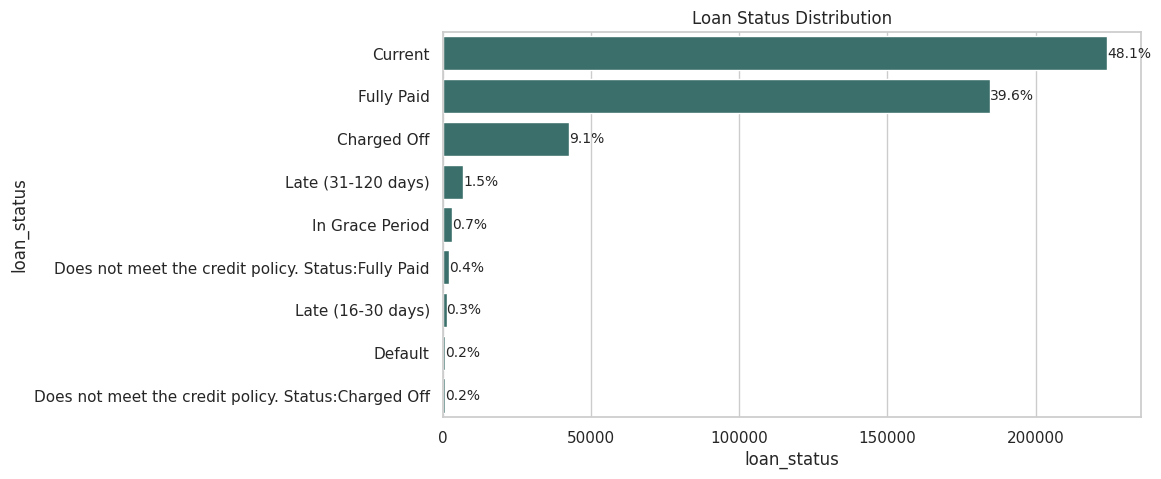

In [ ]:
# Visualisasi

plt.figure(figsize = (9,5))
sns.set_theme(style = 'whitegrid', context = 'notebook')
ax=sns.countplot(y='loan_status', data=df, palette=['#317873'], order=df['loan_status'].value_counts().index)

total=float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_width()/total)
    x=p.get_x()+p.get_width()
    y=p.get_y()+p.get_height()/2
    ax.annotate(percentage, (x,y), ha='left', va='center', fontsize=10)

plt.title('Loan Status Distribution')
plt.xlabel('loan_status')
plt.show()

Dapat dilihat bahwa `loan_status` memiliki beberapa nilai:
*   **Current** berarti peminjam masih aktif dalam pembayaran pinjamannya dan belum mengalami keterlambatan pembayaran. Mereka terus membayar cicilan mereka sesuai dengan jadwal pembayaran.
*   **Fully Paid** berarti peminjam telah membayar semua kewajiban pembayaran mereka sepenuhnya sesuai dengan perjanjian pinjaman. Mereka telah melunasi seluruh pinjaman termasuk bunga dan biaya lainnya.
*   **Charged Off** berarti peminjam dianggap tidak mampu membayar kewajiban pembayaran mereka setelah periode tunggakan tertentu, dan perusahaan menganggap bahwa kemungkinan mereka untuk menerima pembayaran penuh adalah sangat rendah. Pinjaman tersebut dihapus dari buku sebagai kerugian.
*   **Late (31-120 days)** berarti peminjam mengalami keterlambatan pembayaran pinjaman antara 31 hingga 120 hari. Mereka belum melewatkan batas waktu yang cukup lama untuk dianggap sebagai *default*, tetapi keterlambatan pembayaran yang signifikan telah terjadi.
*   **In Grace Period** berarti peminjam telah melewati tanggal jatuh tempo pembayaran tetapi masih dalam masa toleransi atau *grace period* dimana mereka dapat melakukan pembayaran tanpa dikenakan denda.
*   **Does Not Meet the Credit Policy. Status: Fully Paid** berarti peminjam yang sebelumnya dianggap tidak memenuhi kebijakan kredit, tetapi akhirnya berhasil melunasi seluruh pinjaman mereka secara penuh sesuai perjanjian.
*   **Late (16-30 days)** berarti peminjam mengalami keterlambatan pembayaran antara 16 hingga 30 hari. Mereka belum melewatkan batas waktu yang cukup lama untuk dianggap sebagai *default*, tetapi telah melewati tanggal jatuh tempo pembayaran dan mulai menunjukkan tanda-tanda keterlambatan pembayaran.
*   **Default** berarti peminjam gagal memenuhi kewajiban pembayaran sesuai dengan perjanjian pinjaman. Hal ini terjadi ketika peminjam melewati batas waktu tertentu tanpa melakukan pembayaran yang diperlukan.
*   **Does Not Meet the Credit Policy. Status: Charged Off** berarti peminjam yang sebelumnya dianggap tidak memenuhi kebijakan kredit dan akhirnya tidak mampu membayar kewajiban pembayaran mereka. Pinjaman tersebut kemudian dicatat sebagai kerugian.




Dari penjelasan diatas, masing-masing peminjam dapat ditandai apakah mereka merupakan bad risk (peminjam yang memiliki risiko buruk) atau good risk (peminjam yang memiliki risiko baik).

Pembagian ini didasarkan pada status pembayaran dan pengalaman pinjaman mereka. Pinjaman yang terlambat, charged off, atau berakhir sebagai default dianggap sebagai bad risk karena menunjukkan ketidakmampuan peminjam untuk memenuhi kewajiban pembayaran mereka.

Di sisi lain, peminjam yang terus berjalan, sudah lunas atau mengalami keterlambatan ringan dianggap sebagai good risk karena peminjam dapat membayar kewajiban mereka atau telah berhasil melunasi pinjaman mereka.

Akan dibuat kolom `risk_status` berdasarkan `loan_status`, yang berisi:

*   **Bad Risk**

    1. Charged Off
    2. Late (31-120 days)
    3. Late (16-30 days)
    4. Default
    5. Does Not Meet the Credit Policy. Status: Charged Off

*   **Good Risk**

    1. Current
    2. Fully Paid
    3. In Grace Period
    4. Does Not Meet the Credit Policy. Status: Fully Paid





   

In [ ]:
# membuat feature target

df['risk_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default',
                                                     'Does not meet the credit policy. Status:Charged Off']),'bad risk','good risk')

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom target

tot_risk = df['risk_status'].value_counts().reset_index()
tot_risk.columns = ['risk_status', 'total']
tot_risk['%'] = round(tot_risk['total']*100/sum(tot_risk['total']),2)
tot_risk

,risk_status,total,%
0,good risk,414099,88.81
1,bad risk,52186,11.19


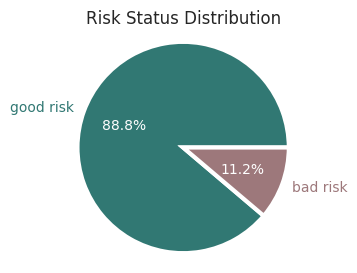

In [ ]:
# visualisasi

fig = plt.figure(figsize=(3,3))
patches, texts, pcts = plt.pie(tot_risk['total'],
                               labels = tot_risk['risk_status'],
                               colors=['#317873', '#9d787b'],
                               autopct='%1.1f%%',
                               wedgeprops={'edgecolor':'white',
                                           'linewidth':3},
                               textprops={'fontsize':10}
                               )

# atur warna label sesuai warna irisan
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=500)
plt.title('Risk Status Distribution')
plt.axis('equal')
plt.show()

**Observasi:**

88.8% Peminjam memiliki risiko baik dan 11.2% peminjam memiliki risiko buruk.
Hal ini menunjukkan bahwa dataset ini *imbalance*.

In [ ]:
# menghapus `loan_status` karena sudah direpresentasikan oleh `risk_status`

df=df.drop(['loan_status'], axis=1)

## Exploratory Data Analysis

### Categorical Features

#### `Term`

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `term`

tot_term = df['term'].value_counts().reset_index()
tot_term.columns = ['term', 'total']
tot_term['%'] = round(tot_term['total']*100/sum(tot_term['total']),2)
tot_term

,term,total,%
0,36 months,337953,72.48
1,60 months,128332,27.52


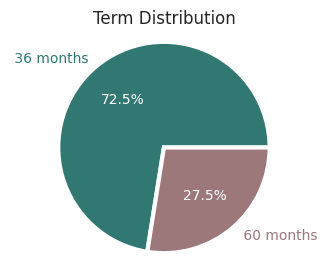

In [ ]:
# visualisasi

fig = plt.figure(figsize=(3,3))
patches, texts, pcts = plt.pie(tot_term['total'],
                               labels = tot_term['term'],
                               colors=['#317873', '#9d787b'],
                               autopct='%1.1f%%',
                               wedgeprops={'edgecolor':'white',
                                           'linewidth':3},
                               textprops={'fontsize':10}
                               )

# atur warna label sesuai warna irisan
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=500)
plt.title('Term Distribution')
plt.axis('equal')
plt.show()

**Observasi:**
1. 72.5% peminjam memiliki durasi pinjaman selama 36 bulan.
2. 27.5% peminjam memiliki durasi pinjaman selama 60 bulan.

Ini menunjukkan bahwa sebagian besar peminjam memiliki durasi pinjaman yang lebih singkat. Hal ini kemungkinan disebabkan oleh jumlah bunga total pada durasi pinjaman yang lebih singkat biasanya lebih rendah sehingga lebih menarik bagi sebagian besar peminjam.

Selain itu, pinjaman dengan durasi yang lebih panjang memiliki risiko yang lebih tinggi karena ada kemungkinan bahwa keadaan keuangan peminjam dapat berubah selama jangka waktu yang panjang sehingga perusahaan lebih berhati-hati dalam memberikan pinjaman dengan durasi pinjaman 60 bulan daripada pinjaman dengan durasi 36 bulan.

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `term` berdasarkan target

r_term = df.groupby(['term','risk_status']).size().reset_index()
r_term.columns = ['term','risk_status', 'total']
r_term['%'] = round(r_term['total']*100/sum(r_term['total']),2)
r_term

,term,risk_status,total,%
0,36 months,bad risk,33579,7.20
1,36 months,good risk,304374,65.28
2,60 months,bad risk,18607,3.99
3,60 months,good risk,109725,23.53


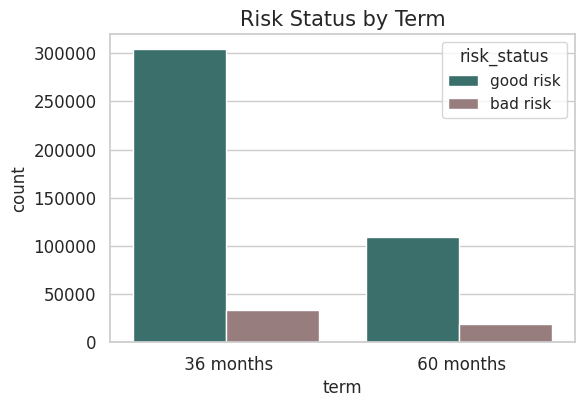

In [ ]:
# visualisasi

fig = plt.figure(figsize = (6,4))
sns.set_theme(style = 'whitegrid', context = 'notebook')
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}

ax=sns.countplot(x='term',
                hue='risk_status', data=df, palette=custom_palette)


plt.xlabel('term', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Risk Status by Term', fontsize=15)
plt.show()

**Observasi:**

Pada pinjaman dengan durasi 36 bulan, 7.2% dari total pinjaman diklasifikasikan sebagai bad risk dan 65,28% dari total pinjaman diklasifikasikan sebagai good risk. Ini menunjukkan bahwa sebagian besar pinjaman dengan jangka waktu 36 bulan dianggap memiliki risiko baik.

Pada pinjaman dengan durasi 60 bulan, 3.99% dari total pinjaman diklasifikasikan sebagai bad risk dan 23.53% dari total pinjaman diklasifikasikan sebagai good risk. Jumlah pinjaman  yang diklasifikasikan sebagai bad risk pada durasi 60 bulan lebih rendah dari durasi 36 bulan. Namun jika melihat persentase pinjaman dengan durasi 60 bulan saja, distribusi risikonya lebih seimbang. Sehingga kemungkinan terjadinya pinjaman dengan risiko buruk relatif lebih tinggi pada pinjaman dengan durasi 60 bulan.









#### `grade`

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `grade`

tot_grade = df['grade'].value_counts().reset_index()
tot_grade.columns = ['grade', 'total']
tot_grade['%'] = round(tot_grade['total']*100/sum(tot_grade['total']),2)
tot_grade

,grade,total,%
0,B,136929,29.37
1,C,125293,26.87
2,D,76888,16.49
3,A,74867,16.06
4,E,35757,7.67
5,F,13229,2.84
6,G,3322,0.71


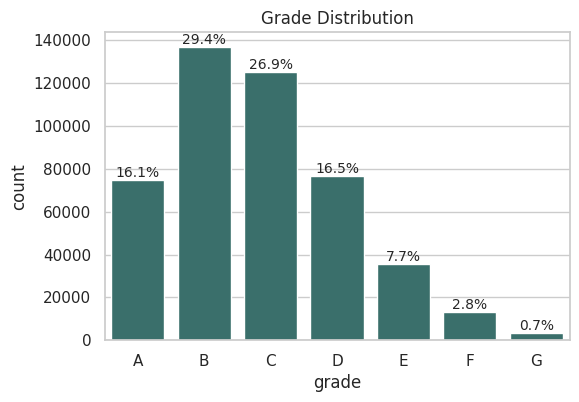

In [ ]:
# visualisasi

plt.figure(figsize = (6,4))
sns.set_theme(style = 'whitegrid', context = 'notebook')
order=['A','B','C','D','E','F','G']

ax=sns.countplot(x='grade', data=df, order=order, color='#317873')

total=float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='bottom', fontsize=10)

plt.title('Grade Distribution')
plt.xlabel('grade')
plt.show()

**Observasi:**
1. LC menetapkan peringkat pinjaman dari A hingga G, dengan *grade* A diberikan kepada pinjaman dengan risiko kredit yang paling rendah.
3. Pinjaman dengan *grade* B memiliki nilai paling tinggi yaitu 29,4%.
4. Pinjaman dengan risiko kredit yang paling rendah (*grade* A) lebih sedikit daripada pinjaman dengan risiko kredit yang sedang (*grade* B dan C).

Perusahaan mungkin lebih longgar dalam memberikan pinjaman dengan *grade* B dan C. *Grade* A cenderung memiliki risiko kredit yang rendah, tetapi juga menawarkan imbal hasil yang lebih rendah juga. Sebaliknya, pinjaman dengan *grade* B dan C mungkin menawarkan imbal hasil yang lebih tinggi dari *grade* A dengan risiko kredit yang sedang.

Perusahaan juga mungkin menerapkan kriteria yang sangat ketat untuk memberikan pinjaman dengan *grade* E, F dan G. Sehingga, hanya sebagian kecil dari peminjam yang memenuhi syarat untuk pinjaman dengan *grade* ini.

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `grade` berdasarkan target

r_grade = df.groupby(['grade','risk_status']).size().reset_index()
r_grade.columns = ['grade','risk_status', 'total']
r_grade['%'] = round(r_grade['total']*100/sum(r_grade['total']),2)
r_grade.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
grade,A,A,B,B,C,C,D,D,E,E,F,F,G,G
risk_status,bad risk,good risk,bad risk,good risk,bad risk,good risk,bad risk,good risk,bad risk,good risk,bad risk,good risk,bad risk,good risk
total,2955,71912,11008,125921,14743,110550,12132,64756,7139,28618,3267,9962,942,2380
%,0.63,15.42,2.36,27.01,3.16,23.71,2.6,13.89,1.53,6.14,0.7,2.14,0.2,0.51


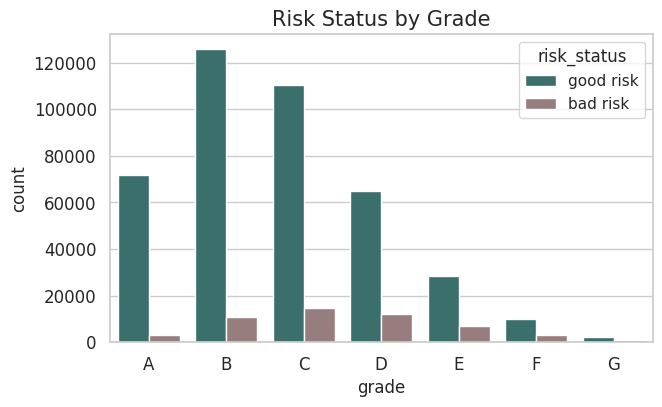

In [ ]:
# visualisasi

fig = plt.figure(figsize = (7,4))
sns.set_theme(style = 'whitegrid', context = 'notebook')
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}
order=['A','B','C','D','E','F','G']

ax=sns.countplot(x='grade', hue='risk_status', data=df, order=order, palette=custom_palette)

plt.xlabel('grade', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Risk Status by Grade', fontsize=15)
plt.show()

**Observasi:**

Seiring menurunnya *grade*, maka:
1. Pinjaman dengan risiko baik juga akan menurun.
2. Berdasarkan distribusi risiko setiap *grade*, kemungkinan terjadinya pinjaman dengan risiko buruk akan meningkat.

Peningkatan kemungkinan terjadinya pinjaman dengan risiko buruk, dapat terjadi karena faktor-faktor berikut:
1. Peminjam yang mendapatkan *grade* kredit rendah, mungkin memiliki catatan  kredit yang kurang baik, rasio utang yang lebih tinggi, atau sejarah pembayaran yang buruk. Sehingga pada akhirnya, meningkatkan kemungkinan terjadinya pinjaman dengan risiko buruk.
2. Perusahaan mungkin menetapkan bunga yang lebih tinggi untuk pinjaman dengan *grade* yang lebih rendah sebagai kompensasi risiko yang lebih tinggi. Sehingga pada akhirnya, meningkatkan kemungkinan terjadinya pinjaman dengan risiko buruk.


#### `emp_length`

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `emp_length`

tot_el = df['emp_length'].value_counts().reset_index()
tot_el.columns = ['emp_length', 'total']
tot_el['%'] = round(tot_el['total']*100/sum(tot_el['total']),2)
tot_el

,emp_length,total,%
0,10+ years,150049,33.70
1,2 years,41373,9.29
2,3 years,36596,8.22
3,< 1 year,36265,8.14
4,5 years,30774,6.91
5,1 year,29622,6.65
6,4 years,28023,6.29
7,7 years,26180,5.88
8,6 years,26112,5.86
9,8 years,22395,5.03


<ipython-input-36-3316efa80a86>:7: UserWarning: 
The palette list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(y='emp_length', data=df, order=order, palette=['#317873'])


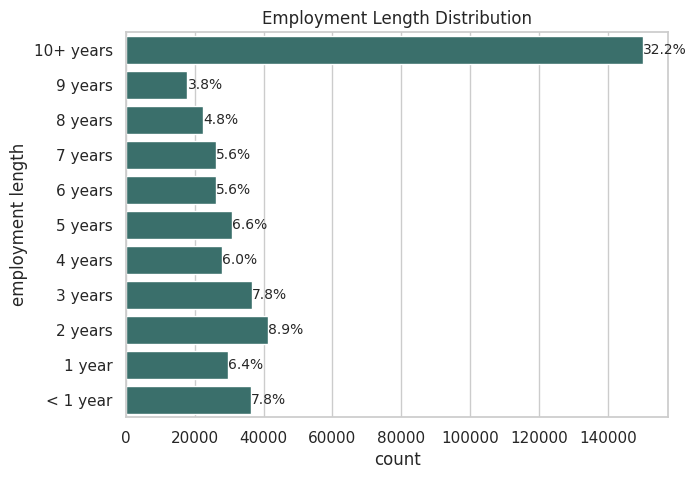

In [ ]:
# visualisasi

plt.figure(figsize = (7,5))
sns.set_theme(style = 'whitegrid', context = 'notebook')
order = ['10+ years', '9 years', '8 years', '7 years', '6 years', '5 years',
         '4 years', '3 years', '2 years', '1 year', '< 1 year']
ax=sns.countplot(y='emp_length', data=df, order=order, palette=['#317873'])

total=float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_width()/total)
    x=p.get_x()+p.get_width()
    y=p.get_y()+p.get_height()/2
    ax.annotate(percentage, (x,y), ha='left', va='center', fontsize=10)

plt.title('Employment Length Distribution')
plt.xticks()
plt.ylabel('employment length')
plt.show()

**Observasi:**
1. `emp_length` berisi informasi lama masa kerja peminjam saat mengajukan pinjaman.
2. Peminjam paling banyak telah bekerja diatas 10 tahun. Hal ini terjadi karena semakin lama seseorang bekerja, biasanya dianggap semakin stabil secara finansial, yang dapat menjadi faktor yang menguntungkan dalam penilaian kredit.

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `emp_length` berdasarkan target

r_el = df.groupby(['emp_length','risk_status']).size().reset_index()
r_el.columns = ['emp_length','risk_status', 'total']
r_el['%'] = round(r_el['total']*100/sum(r_el['total']),2)
r_el

,emp_length,risk_status,total,%
0,1 year,bad risk,3386,0.76
1,1 year,good risk,26236,5.89
2,10+ years,bad risk,15325,3.44
3,10+ years,good risk,134724,30.26
4,2 years,bad risk,4647,1.04
5,2 years,good risk,36726,8.25
6,3 years,bad risk,4108,0.92
7,3 years,good risk,32488,7.30
8,4 years,bad risk,3151,0.71
9,4 years,good risk,24872,5.59


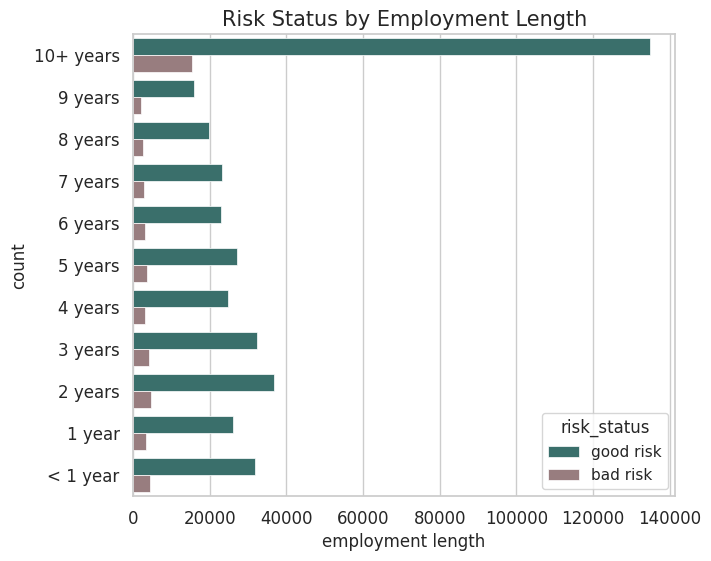

In [ ]:
# visualisasi

plt.figure(figsize = (7,6))

sns.set_theme(style = 'whitegrid', context = 'notebook')
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}

order = ['10+ years', '9 years', '8 years', '7 years', '6 years', '5 years',
         '4 years', '3 years', '2 years', '1 year', '< 1 year']

ax=sns.countplot(y='emp_length',
                hue='risk_status', data=df, order=order, linewidth=0.5, palette=custom_palette)

plt.xlabel('employment length', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Risk Status by Employment Length', fontsize=15)
plt.show()

**Observasi:**

Kemungkinan terjadinya pinjaman dengan risiko buruk paling rendah pada peminjam dengan lama masa kerja 10 tahun lebih. Hal ini mungkin dikarenakan faktor-faktor berikut:
1. Peminjam yang sudah bekerja lebih dari 10 tahun mungkin memiliki stabilitas finansial yang lebih baik sehingga dapat mengurangi risiko gagal bayar.
2. Peminjam yang telah bekerja lebih dari 10 tahun mungkin memiliki catatan kredit yang lebih baik karena telah membangun sejarah kredit yang panjang.
3. Peminjam yang telah bekerja lebih dari 10 tahun mungkin memiliki stabilitas pekerjaan yang lebih tinggi. Hal ini dapat memberikan kepastian bahwa merka akan terus memiliki pendapatan yang cukup untuk membayar pinjaman.

#### `home_ownership`

In [ ]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: count, dtype: int64

In [ ]:
# Mengelompokkan label other, none, any pada `home ownership`

df['home_ownership'] = df['home_ownership'].replace(['OTHER', 'NONE', 'ANY'], 'OTHER')

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `home_ownership`

tot_hos = df['home_ownership'].value_counts().reset_index()
tot_hos.columns = ['home_ownership', 'total']
tot_hos['%'] = round(tot_hos['total']*100/sum(tot_hos['total']),2)
tot_hos

,home_ownership,total,%
0,MORTGAGE,235875,50.59
1,RENT,188473,40.42
2,OWN,41704,8.94
3,OTHER,233,0.05


<ipython-input-42-c0243d9f680e>:6: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(x='home_ownership', data=df, order=order, palette=['#317873'])


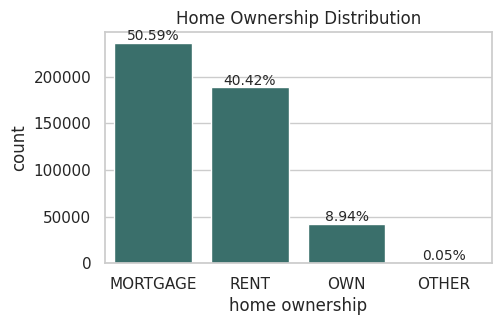

In [ ]:
# visualisasi

plt.figure(figsize = (5,3))
sns.set_theme(style = 'whitegrid', context = 'notebook')
order=df['home_ownership'].value_counts().index
ax=sns.countplot(x='home_ownership', data=df, order=order, palette=['#317873'])

total=float(len(df))
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='bottom', fontsize=10)

plt.title('Home Ownership Distribution')
plt.xlabel('home ownership')
plt.show()

**Observasi:**

Lebih dari 50% peminjam memiliki rumah tetapi masih membayar cicilan kepada lembaga keuangan yang memberikan pinjaman untuk membeli rumah tersebut.

Peminjam yang memiliki hipotek mungkin dianggap lebih stabil secara finansial karena telah memenuhi syarat untuk mendapatkan pinjaman hipotek dan telah mampu membayar cicilan hipotek mereka secara teratur. Selain itu, peminjam yang memiliki hipotek cenderung memiliki aset dalam bentuk rumah yang digunakan sebagai jaminan. Oleh karena itu, perusahaan mungkin menganggap peminjam yang memiliki hipotek memiliki keamanan finansial yang lebih besar.


In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `home_ownership` berdasarkan target

r_hos = df.groupby(['home_ownership','risk_status']).size().reset_index()
r_hos.columns = ['home_ownership','risk_status', 'total']
r_hos['%'] = round(r_hos['total']*100/sum(r_hos['total']),2)
r_hos

,home_ownership,risk_status,total,%
0,MORTGAGE,bad risk,23247,4.99
1,MORTGAGE,good risk,212628,45.60
2,OTHER,bad risk,46,0.01
3,OTHER,good risk,187,0.04
4,OWN,bad risk,4643,1.00
5,OWN,good risk,37061,7.95
6,RENT,bad risk,24250,5.20
7,RENT,good risk,164223,35.22


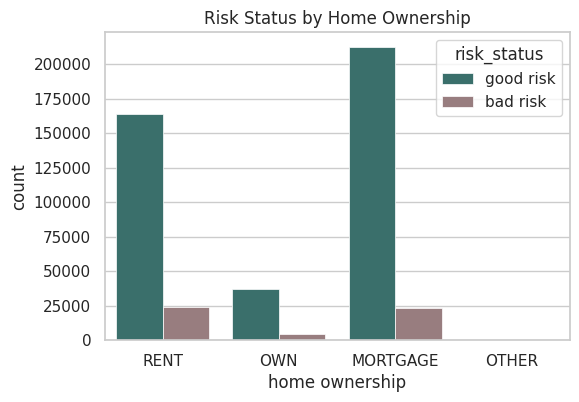

In [ ]:
# visualisasi

plt.figure(figsize = (6,4))
sns.set_theme(style = 'whitegrid', context = 'notebook')
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}
ax=sns.countplot(x='home_ownership',
                hue='risk_status', data=df, linewidth=0.5, palette=custom_palette)

plt.xlabel('home ownership')
plt.xticks()
plt.title('Risk Status by Home Ownership')
plt.show()

**Observasi:**

Jika dilihat dari distribusi risiko setiap status kepemilikan rumah, maka:
1. Kemungkinan terjadinya pinjaman dengan risiko buruk paling rendah pada peminjam dengan status kepemilikan rumah *mortgage*.
2. Kemungkinan terjadinya pinjaman dengan risiko buruk paling tinggi pada peminjam dengan status kepemilikan rumah tidak jelas atau tidak ada (*OTHER*).

#### `verification_status`

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `verification_status`

tot_vs = df['verification_status'].value_counts().reset_index()
tot_vs.columns = ['verification_status', 'total']
tot_vs['%'] = round(tot_vs['total']*100/sum(tot_vs['total']),2)
tot_vs

,verification_status,total,%
0,Verified,168055,36.04
1,Source Verified,149993,32.17
2,Not Verified,148237,31.79


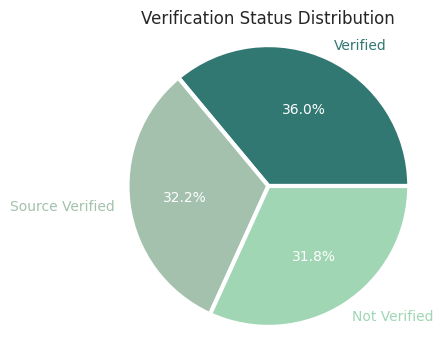

In [ ]:
# visualisasi

plt.figure(figsize=(4,4))
patches, texts, pcts = plt.pie(tot_vs['total'],
                               labels = tot_vs['verification_status'],
                               colors=['#317873', '#a3c1ad', '#a0d6b4'],
                               autopct='%1.1f%%',
                               wedgeprops={'edgecolor':'white',
                                           'linewidth':3},
                               textprops={'fontsize':10}
                               )

# atur warna label sesuai warna irisan
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=500)
plt.title('Verification Status Distribution')
plt.axis('equal')
plt.show()

**Observasi:**
1. Sebanyak 36% peminjam telah melewati proses verifikasi yang memadai oleh perusahaan.
2. Sebanyak 32.2% peminjam telah mengumpulkan data dan data tersebut telah diverifikasi.
3. Sebanyak 31.8% peminjam tidak terverifikasi. Ini berarti sebagian besar peminjam dari kategori ini belum melewati proses verifikasi atau tidak memenuhi kriteria.

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `verification status` berdasarkan target

r_vs = df.groupby(['verification_status','risk_status']).size().reset_index()
r_vs.columns = ['verification_status','risk_status', 'total']
r_vs['%'] = round(r_vs['total']*100/sum(r_vs['total']),2)
r_vs

,verification_status,risk_status,total,%
0,Not Verified,bad risk,14205,3.05
1,Not Verified,good risk,134032,28.74
2,Source Verified,bad risk,16090,3.45
3,Source Verified,good risk,133903,28.72
4,Verified,bad risk,21891,4.69
5,Verified,good risk,146164,31.35


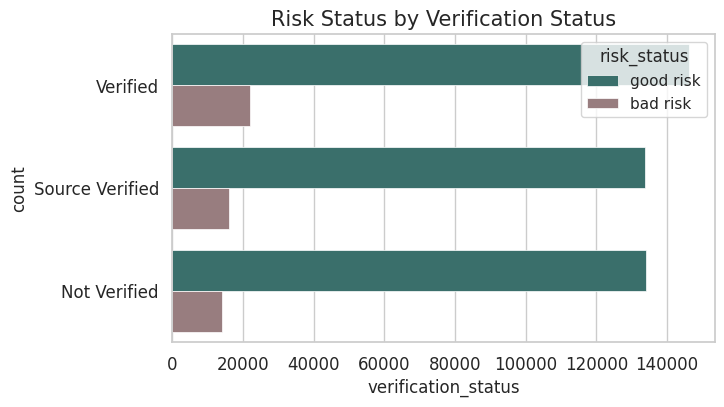

In [ ]:
# visualisasi

plt.figure(figsize = (7,4))

sns.set_theme(style = 'whitegrid', context = 'notebook')
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}

ax=sns.countplot(y='verification_status',
                hue='risk_status', data=df, linewidth=0.5, palette=custom_palette)

plt.xlabel('verification_status', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Risk Status by Verification Status', fontsize=15)
plt.show()

**Observasi:**

Meskipun ada perbedaan dalam persentase pinjaman dengan risiko baik dan buruk antara kategori verification status, tidak ada kategori yang distribusi risikonya signifikan. Namun, pinjaman dengan risiko buruk sedikit lebih tinggi dalam kategori "verified", meskipun telah melewati proses verifikasi.

#### `purpose`

In [ ]:
# melihat persentase kemunculan nilai-nilai pada kolom `purpose`

tot_purpose = df['purpose'].value_counts().reset_index()
tot_purpose.columns = ['purpose', 'total']
tot_purpose['%']= round(tot_purpose['total']*100/sum(tot_purpose['total']),2)
tot_purpose

,purpose,total,%
0,debt_consolidation,274195,58.80
1,credit_card,104157,22.34
2,home_improvement,26537,5.69
3,other,23690,5.08
4,major_purchase,9828,2.11
5,small_business,7013,1.50
6,car,5397,1.16
7,medical,4602,0.99
8,moving,2994,0.64
9,vacation,2487,0.53


<ipython-input-50-6fcc3a114ed5>:7: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(y='purpose', data=df, palette=['#317873'])


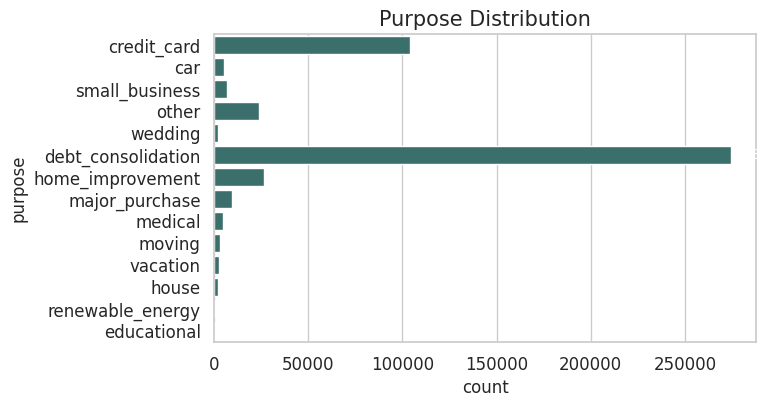

In [ ]:
# visualisasi

fig = plt.figure(figsize = (7,4))

sns.set_theme(style = 'whitegrid', context = 'notebook')

ax=sns.countplot(y='purpose', data=df, palette=['#317873'])

total=float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_width()/total)
    x=p.get_x()+p.get_width()
    y=p.get_y()+p.get_height()/2
    ax.annotate(percentage, (x,y), ha='left', va='center', fontsize=10, color='white')

plt.xlabel('count', fontsize=12)
plt.ylabel('purpose', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Purpose Distribution', fontsize=15)
plt.show()

**Observasi:**

Lebih dari 50% peminjam memiliki tujuan peminjaman debt consolidation, yaitu mengambil pinjaman baru untuk membayar utang-utang.

#### `initial_list_status`

In [ ]:
tot_ils = df['initial_list_status'].value_counts().reset_index()
tot_ils.columns = ['initial_list_status', 'total']
tot_ils['%'] = round(tot_ils['total']*100/sum(tot_ils['total']),2)
tot_ils

,initial_list_status,total,%
0,f,303005,64.98
1,w,163280,35.02


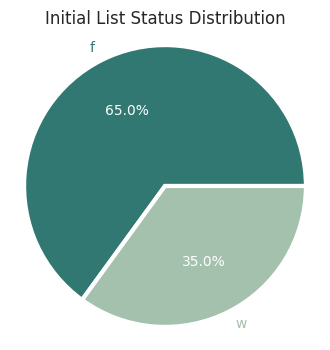

In [ ]:
# visualisasi

plt.figure(figsize=(4,4))
patches, texts, pcts = plt.pie(tot_ils['total'],
                               labels = tot_ils['initial_list_status'],
                               colors=['#317873', '#a3c1ad'],
                               autopct='%1.1f%%',
                               wedgeprops={'edgecolor':'white',
                                           'linewidth':3},
                               textprops={'fontsize':10}
                               )

# atur warna label sesuai warna irisan
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=500)
plt.title('Initial List Status Distribution')
plt.axis('equal')
plt.show()

**Observasi:**
1. Sebanyak 65% merupakan fraksional, yaitu pinjaman tersebut dibagi menjadi bagian-bagian kecil dan diinvestasikan oleh beberapa investor.
2. Sebanyak 35% merupakan pinjaman utuh (whole), yaitu pinjaman tersebut tidak dibagi-bagi dan diinvestasikan secara utuh oleh satu investor.

In [ ]:
r_ils = df.groupby(['initial_list_status','risk_status']).size().reset_index()
r_ils.columns = ['initial_list_status','risk_status', 'total']
r_ils['%'] = round(r_ils['total']*100/sum(r_ils['total']),2)
r_ils

,initial_list_status,risk_status,total,%
0,f,bad risk,37122,7.96
1,f,good risk,265883,57.02
2,w,bad risk,15064,3.23
3,w,good risk,148216,31.79


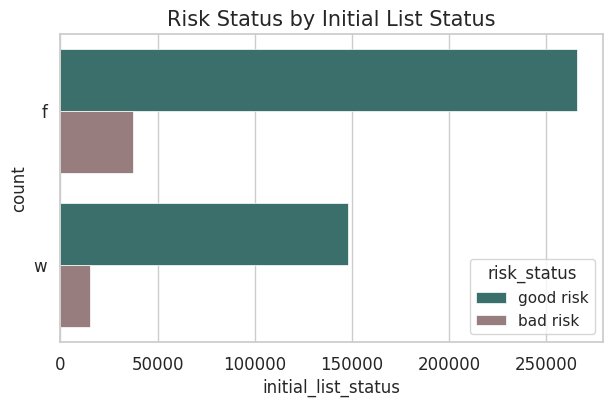

In [ ]:
# visualisasi

fig = plt.figure(figsize = (7,4))

sns.set_theme(style = 'whitegrid', context = 'notebook')

custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}

ax=sns.countplot(y='initial_list_status',
                hue='risk_status', data=df, linewidth=0.5, palette=custom_palette)

plt.xlabel('initial_list_status', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Risk Status by Initial List Status', fontsize=15)
plt.show()

**Observasi:**

Jika dilihat dari distribusi risiko setiap status kepemilikan rumah, maka kemungkinan terjadinya pinjaman dengan risiko buruk lebih rendah terjadi pada peminjam dengan status initial list whole (utuh).

Dengan investasi dalam pinjaman yang terdaftar secara utuh (whole), investor mungkin memiliki kepastian tentang proyeksi pengembalian investasi mereka. Hal ini dapat mengurangi risiko secara keseluruhan.


### Numerical Features

#### `loan_amnt`

In [ ]:
# melihat distribusi data pada kolom `loan_amnt`

df['loan_amnt'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.0,8000.0,12000.0,20000.0,35000.0


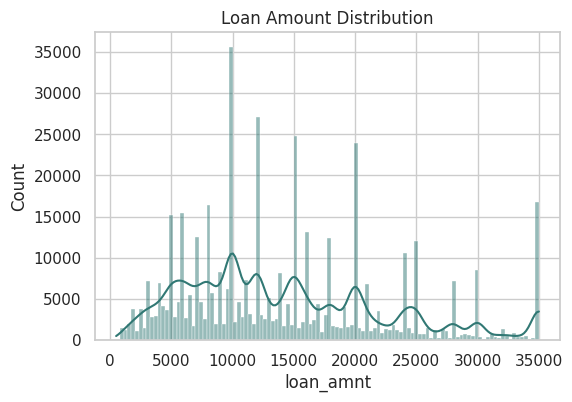

In [ ]:
# visualisasi

plt.figure(figsize = (6,4))
sns.set_theme(style = 'whitegrid', context = 'notebook')
ax=sns.histplot(x='loan_amnt', data=df, kde=True, color='#317874')

plt.xlabel('loan_amnt')
plt.xticks()
plt.title('Loan Amount Distribution')
plt.show()

**Observasi:**

Dari histogram tersebut, kita dapat melihat bahwa sebagian besar pinjaman memiliki nilai yang lebih rendah, dengan puncak frekuensi terjadi di sekitar 8000 hingga 12000. Distribusi ini memiliki rata-rata sekitar 14317.28 dan standar deviasi sebesar 8286.51, yang mengindikasikan sebaran data dari nilai rata-rata. Rentang interkuartil dari 8000 hingga 20000 menunjukkan sebagian besar nilai pinjaman yang tersebar di antara kuartil pertama hingga kuartil ketiga, dengan nilai minimum sebesar 500 dan nilai maksimum sebesar 35000.

In [ ]:
# melihat distribusi data pada kolom `loan_amnt` berdasarkan `risk_status`

df.groupby('risk_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
bad risk,52186.0,14624.953053,8390.633508,500.0,8000.0,12800.0,20000.0,35000.0
good risk,414099.0,14278.503389,8272.492476,500.0,8000.0,12000.0,20000.0,35000.0


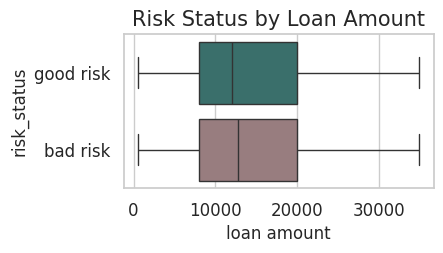

In [ ]:
# visualisasi


fig = plt.figure(figsize = (4,2))
sns.set_theme(style = 'whitegrid', context = 'notebook')
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}

ax=sns.boxplot(x=df['loan_amnt'], y=df['risk_status'], palette=custom_palette)

plt.xlabel('loan amount', fontsize=12)
plt.ylabel('risk_status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Risk Status by Loan Amount', fontsize=15)
plt.show()

**Observasi:**

Dari boxplot diatas, kita dapat melihat bahwa median *loan amount* untuk kategori "*bad risk*" (sekitar 12800) sedikit lebih tinggi daripada median untuk kategori "*good risk*" (sekitar 12000). Artinya, secara keseluruhan, peminjam dengan risiko buruk cenderung memiliki *loan amount* yang sedikit lebih tinggi dibandingkan dengan peminjam dengan risiko baik. Namun, perbedaan ini tidak terlalu signifikan dan distribusi *loan amount* pada kedua kategori masih relatif serupa.

#### `total_pymnt`

In [ ]:
# melihat distribusi data pada kolom `total_pymnt`
df['total_pymnt'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
total_pymnt,466285.0,11540.68622,8265.627112,0.0,5552.125349,9419.250943,15308.15846,57777.57987


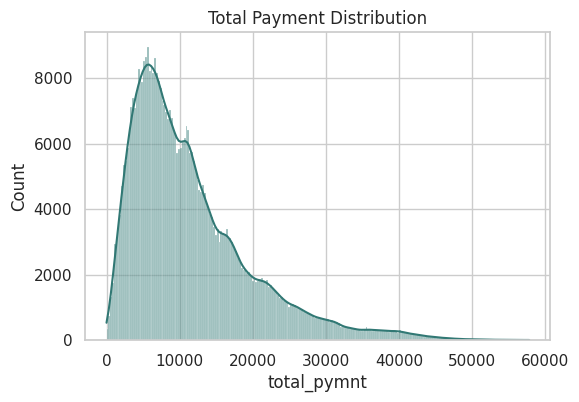

In [ ]:
# visualisasi

plt.figure(figsize = (6,4))
sns.set_theme(style = 'whitegrid', context = 'notebook')
ax=sns.histplot(x='total_pymnt', data=df, kde=True, color='#317874')

plt.xlabel('total_pymnt')
plt.xticks()
plt.title('Total Payment Distribution')
plt.show()

**Observasi:**

Dari histogram tersebut, kita bisa melihat bahwa distribusinya condong ke kanan (*positively skewed*), dengan *mean* (rata-rata) sekitar 11540.69. Puncak frekuensi *total payment* berada di rentang antara 0 hingga sekitar 15308.16, dengan nilai-nilai yang jarang terjadi di sisi kanan distribusi (nilai yang lebih tinggi).

In [ ]:
# melihat distribusi data pada kolom `total_pymnt` berdasarkan target

df.groupby('risk_status')['total_pymnt'].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
bad risk,52186.0,7024.191781,5675.182531,0.00,3012.5975,5491.77,9372.742500,50197.03000
good risk,414099.0,12109.868417,8365.228761,394.13,5997.4250,10038.65,16025.072165,57777.57987


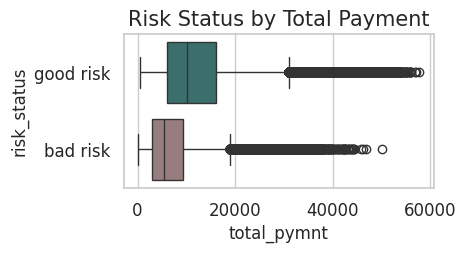

In [ ]:
# visualisasi

fig = plt.figure(figsize = (4,2))

sns.set_theme(style = 'whitegrid', context = 'notebook')
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}

ax=sns.boxplot(x=df['total_pymnt'], y=df['risk_status'], palette=custom_palette)

plt.xlabel('total_pymnt', fontsize=12)
plt.ylabel('risk_status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Risk Status by Total Payment', fontsize=15)
plt.show()

**Observasi:**

Dari boxplot diatas, kita bisa melihat perbedaan dalam distribusi *total payment* antara kategori *bad risk* dan *good risk*.

**Untuk *bad risk*:**
- ***Median*** (nilai tengah) sekitar 5491.77.
- ***Mean*** (rata-rata) sekitar 7024.19, yang lebih rendah dari median karena ada beberapa nilai total *payment* yang sangat tinggi (*outlier*) yang mempengaruhi rata-rata.
- ***Range*** (rentang) nilai total *payment* dari minimum hingga maksimum cukup besar, yaitu dari 0 hingga 50197.03.

Sementara itu, **untuk *good risk*:**
- ***Median*** dari total *payment* sekitar 10038.65.
- ***Mean*** dari total *payment* sekitar 12109.87, yang juga dipengaruhi oleh beberapa nilai total *payment* yang sangat tinggi.
- ***Range*** nilai total *payment* dari minimum hingga maksimum lebih besar daripada pada *bad risk*, yaitu dari 394 hingga 57777,57987.

Ini menunjukkan bahwa pada kategori *good risk*, total *payment* cenderung lebih tinggi dan lebih bervariasi daripada pada kategori *bad risk*.

#### `total_rec_late_fee`

In [ ]:
# melihat distribusi data pada kolom `total_rec_late_fee` berdasarkan target

df.groupby('risk_status')['total_rec_late_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
bad risk,52186.0,2.899193,11.129846,0.0,0.0,0.0,0.0,358.680000
good risk,414099.0,0.366695,3.859253,0.0,0.0,0.0,0.0,286.747566


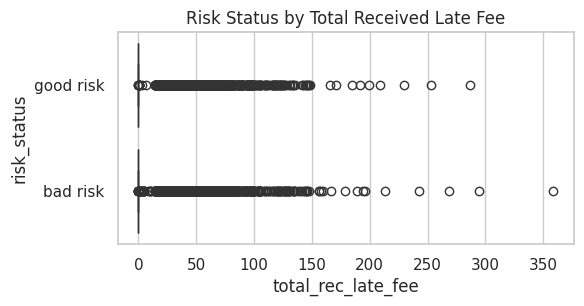

In [ ]:
# visualisasi

plt.figure(figsize=(6,3))
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}
ax=sns.boxplot(x=df['total_rec_late_fee'], y=df['risk_status'], palette=custom_palette)
plt.xlabel('total_rec_late_fee')
plt.tight_layout()
plt.title('Risk Status by Total Received Late Fee')
plt.show()

**Observasi:**

Pada kedua kategori risiko, baik *bad risk* maupun *good risk*, sebagian besar data memiliki nilai nol untuk *total received late fee*, seperti yang tercermin dari kenyataan bahwa nilai *median* (50%) dan kuartil ketiga (75%) adalah nol. Hal ini menunjukkan bahwa sebagian besar pinjaman tidak memiliki denda keterlambatan pembayaran. Namun, ada beberapa *outlier* yang memiliki nilai *total received late fee* yang cukup tinggi, terutama pada kategori *bad risk*. Hal ini menunjukkan bahwa sebagian kecil pinjaman mungkin mengalami keterlambatan pembayaran yang signifikan.

#### `recoveries` and `collection_recovery_fee`

In [ ]:
# melihat distribusi data pada kolom `recoveries` berdasarkan target

df.groupby('risk_status')['recoveries'].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
bad risk,52186.0,762.555581,1486.036802,0.0,0.0,0.0,999.7625,33520.27
good risk,414099.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.00


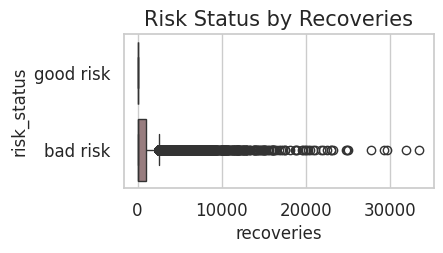

In [ ]:
# visualisasi

fig = plt.figure(figsize = (4,2))
sns.set_theme(style = 'whitegrid', context = 'notebook')
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}

ax=sns.boxplot(x=df['recoveries'], y=df['risk_status'], palette=custom_palette)

plt.xlabel('recoveries', fontsize=12)
plt.ylabel('risk_status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Risk Status by Recoveries', fontsize=15)
plt.show()

**Observasi:**

Boxplot tersebut menunjukkan distribusi nilai *recoveries* berdasarkan *risk status*. Pada kategori *bad risk*, terlihat bahwa sebagian besar pinjaman yang mengalami risiko buruk memiliki nilai *recoveries* yang cukup tinggi, dengan kuartil ketiga (75%) mencapai 999.7625. Hal ini menunjukkan bahwa dalam kategori *bad risk*, terdapat sejumlah pinjaman yang mengalami penarikan kembali atau pemulihan dana yang signifikan setelah mengalami kegagalan pembayaran.

Di sisi lain, pada kategori *good risk*, boxplot menunjukkan bahwa sebagian besar pinjaman tidak memiliki nilai *recoveries* sama sekali, seperti yang tercermin dari *median* (50%) dan kuartil ketiga (75%) yang bernilai nol. Hal ini mengindikasikan bahwa sebagian besar pinjaman dalam kategori *good risk* tidak memerlukan tindakan pemulihan dana oleh perusahaan, karena peminjam cenderung membayar pinjamannya secara lancar dan tepat waktu.

In [ ]:
# melihat distribusi data pada kolom `collection_recovery_fee` berdasarkan target

df.groupby('risk_status')['collection_recovery_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
bad risk,52186.0,80.071836,244.154672,0.0,0.0,0.0,18.0,7002.19
good risk,414099.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00


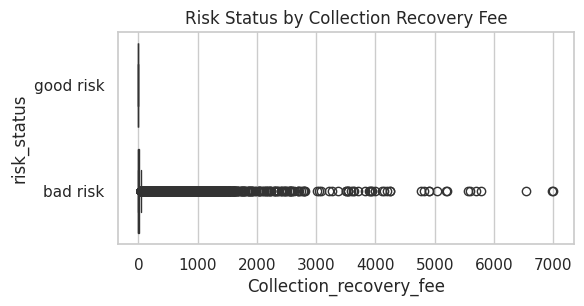

In [ ]:
# visualisasi

plt.figure(figsize=(6,3))
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}
ax=sns.boxplot(x=df['collection_recovery_fee'], y=df['risk_status'], palette=custom_palette)

plt.xlabel('Collection_recovery_fee')
plt.tight_layout()
plt.title('Risk Status by Collection Recovery Fee')
plt.show()

**Observasi:**

Peminjam dalam kategori *bad risk* cenderung menyebabkan kerugian lebih besar bagi perusahaan, sehingga perusahaan perlu melakukan upaya pemulihan dana yang lebih agresif dan mungkin menetapkan biaya pemulihan kepada peminjam. Di sisi lain, peminjam dalam kategori good risk cenderung membayar tepat waktu atau secara penuh, sehingga tidak ada kebutuhan untuk melakukan pemulihan dana atau mengenakan biaya pemulihan kepada mereka.

#### `total_rec_prncp`

In [ ]:
# melihat distribusi data pada kolom `total_rec_prncp`
df['total_rec_prncp'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
total_rec_prncp,466285.0,8866.014657,7031.687997,0.0,3708.56,6817.76,12000.0,35000.03


In [ ]:
# melihat distribusi data pada kolom `total_rec_prncp` berdasarkan target

df.groupby('risk_status')['total_rec_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
bad risk,52186.0,3829.815241,3581.790642,0.00,1411.555,2790.015,5078.055,34483.27
good risk,414099.0,9500.691637,7103.511739,273.66,4214.910,7500.000,12481.370,35000.03


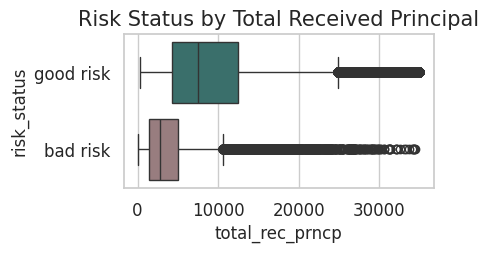

In [ ]:
# visualisasi

fig = plt.figure(figsize = (4,2))

sns.set_theme(style = 'whitegrid', context = 'notebook')
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}

ax=sns.boxplot(x=df['total_rec_prncp'], y=df['risk_status'], palette=custom_palette)

plt.xlabel('total_rec_prncp', fontsize=12)
plt.ylabel('risk_status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Risk Status by Total Received Principal', fontsize=15)
plt.show()

**Observasi:**

Pada *bad risk*, nilai rata-rata total pokok pinjaman yang diterima lebih rendah (3829.82) dibandingkan dengan *good risk* (9500.69).Standar deviasi pada *bad risk* (3581.79) juga lebih rendah dibandingkan dengan *good risk* (7103.51), menunjukkan bahwa penyebaran data pada *bad risk* lebih rapat dibandingkan dengan *good risk*. *Median* (50%) pada *bad risk* adalah 2790.015, sedangkan pada *good risk* adalah 7500.00. Hal ini menunjukkan bahwa nilai tengah distribusi total pokok yang diterima oleh perusahaan lebih tinggi pada g*ood risk* dibandingkan dengan *bad risk*. Pada *bad risk*, terdapat nilai minimum 0 hingga maksimum 34483.27, sedangkan pada *good risk*, nilai minimum adalah 273.66 dan maksimum adalah 35000.03.

#### `total_rec_int`

In [ ]:
# melihat distribusi data pada kolom `total_rec_int`
df['total_rec_int'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
total_rec_int,466285.0,2588.677225,2483.809661,0.0,957.28,1818.88,3304.53,24205.62


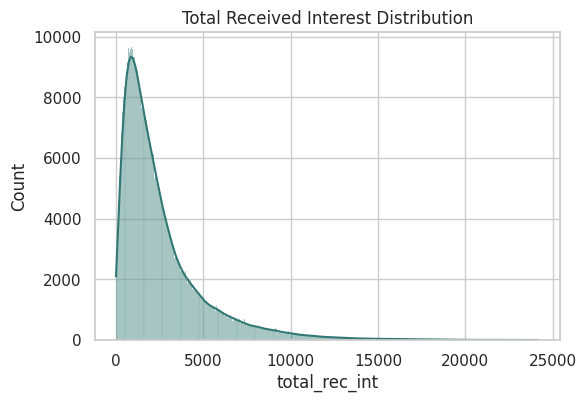

In [ ]:
# visualisasi

plt.figure(figsize = (6,4))
sns.set_theme(style = 'whitegrid', context = 'notebook')
ax=sns.histplot(x='total_rec_int', data=df, kde=True, color='#317874')

plt.xlabel('total_rec_int')
plt.xticks()
plt.title('Total Received Interest Distribution')
plt.show()

**Observasi:**

Histogram diatas menunjukkan distribusi jumlah bunga yang diterima oleh perusahaan dari peminjam. Distribusi tersebut memiliki *mean* sebesar 2588.68 dan standar deviasi sebesar 2483.81. Hal ini menunjukkan variasi yang cukup besar dalam jumlah bunga yang diterima oleh perusahaan dari berbagai pinjaman.

Penyebab variasi tersebut dapat disebabkan oleh berbagai faktor, termasuk tingkat suku bunga yang berbeda-beda dari setiap pinjaman, jangka waktu pinjaman yang beragam, serta kondisi ekonomi yang memengaruhi tingkat bunga secara keseluruhan. Selain itu, perbedaan dalam kebijakan pembayaran bunga antara peminjam juga dapat memengaruhi distribusi Total Received Interest.

In [ ]:
# melihat distribusi data pada kolom `total_rec_int` berdasarkan target

df.groupby('risk_status')['total_rec_int'].describe()

,count,mean,std,min,25%,50%,75%,max
risk_status,,,,,,,,
bad risk,52186.0,2428.921762,2428.484669,0.0,826.035,1662.465,3147.7975,22355.83
good risk,414099.0,2608.810088,2489.970419,0.0,974.580,1837.770,3324.1450,24205.62


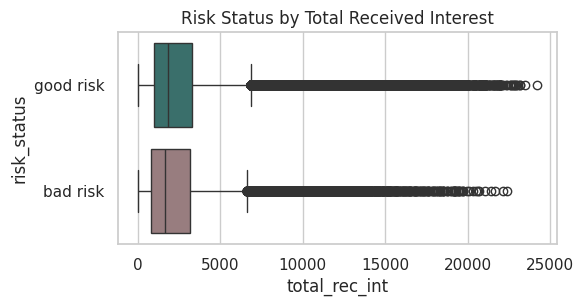

In [ ]:
# visualisasi

plt.figure(figsize=(6,3))
custom_palette = {'good risk':'#317873',
                  'bad risk':'#9d787b'}
ax=sns.boxplot(x=df['total_rec_int'], y=df['risk_status'], palette=custom_palette)
plt.xlabel('total_rec_int')
plt.tight_layout()
plt.title('Risk Status by Total Received Interest')
plt.show()

**Observasi:**

Dari hasil boxplot tersebut, terdapat perbedaan dalam distribusi bunga yang diterima antara *bad risk* dan *good risk*:

- Pada *bad risk*, rata-rata jumlah bunga yang diterima lebih rendah (2428.92) dibandingkan dengan *good risk* (2608.81).
- Standar deviasi pada *bad risk* (2428.48) hampir sama dengan *good risk* (2489.97), menunjukkan bahwa penyebaran data bunga relatif seragam di sekitar rata-rata pada kedua kelompok.
- Nilai minimum bunga yang diterima adalah 0 untuk kedua kelompok, yang mungkin disebabkan oleh pinjaman yang tidak menghasilkan bunga.
- *Median* (50%) jumlah bunga yang diterima pada *bad risk* adalah 1662.47, sementara pada *good risk* adalah 3324.14. Median yang lebih tinggi pada *good risk* menunjukkan bahwa sebagian besar pinjaman dalam kategori tersebut menerima jumlah bunga yang lebih tinggi daripada bad risk.
- Nilai maksimum bunga yang diterima pada *bad risk* adalah 22355.83, sedangkan pada *good risk* adalah 24205.62.


### Time Series Features

#### `issue_d`

In [ ]:
# total pemberian pinjaman per tahun

issue_yrs = df['issue_d'].dt.year.value_counts().reset_index()
issue_yrs.columns = ['issue_yrs', 'total']
issue_yrs['%'] = round(issue_yrs['total']*100/sum(issue_yrs['total']),2)
issue_yrs

,issue_yrs,total,%
0,2014,235628,50.53
1,2013,134755,28.90
2,2012,53367,11.45
3,2011,21721,4.66
4,2010,12537,2.69
5,2009,5281,1.13
6,2008,2393,0.51
7,2007,603,0.13


In [ ]:
# total pemberian pinjaman per tahun berdasarkan target

r_issue_yrs = df.groupby([(df['issue_d'].dt.year), 'risk_status']).size().reset_index()
r_issue_yrs.columns = ['issue_yrs', 'risk_status', 'total']
r_issue_yrs['%'] = round(r_issue_yrs['total']*100/sum(r_issue_yrs['total']),2)
r_issue_yrs

,issue_yrs,risk_status,total,%
0,2007,bad risk,158,0.03
1,2007,good risk,445,0.10
2,2008,bad risk,496,0.11
3,2008,good risk,1897,0.41
4,2009,bad risk,723,0.16
5,2009,good risk,4558,0.98
6,2010,bad risk,1761,0.38
7,2010,good risk,10776,2.31
8,2011,bad risk,3270,0.70
9,2011,good risk,18451,3.96


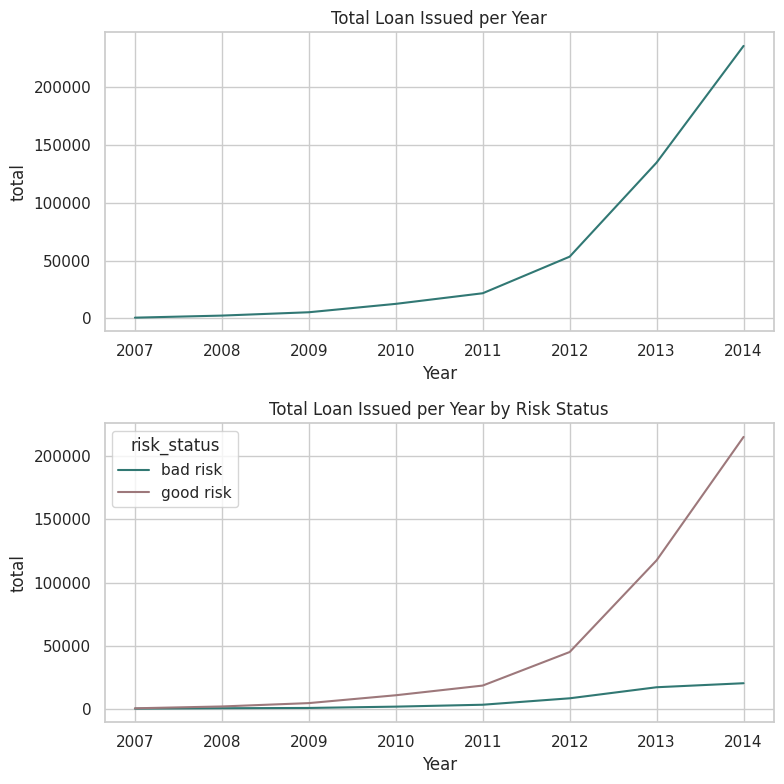

In [ ]:
# visualisasi

fig, ax = plt.subplots(2,1, figsize=(8,8))
sns.set_theme(style = 'whitegrid', context = 'notebook')

# total peminjam yang membuka garis kredit pertama per tahun
sns.lineplot(x='issue_yrs', y='total', data=issue_yrs, color='#317874', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_title('Total Loan Issued per Year')

# total peminjam yang membuka garis kredit pertama per tahun berdasarkan target
sns.lineplot(x='issue_yrs', y='total', hue='risk_status', data=r_issue_yrs, palette = ['#317873', '#9d787b'], ax=ax[1])
ax[1].set_xlabel('Year')
ax[1].set_title('Total Loan Issued per Year by Risk Status')

plt.tight_layout()
plt.show()

**Observation:**

Grafik **"Total Loan Issued per Year"** menunjukkan tren peningkatan jumlah pinjaman dari tahun ke tahun, dengan jumlah pinjaman yang signifikan terjadi pada tahun 2014.

Sementara itu, ketika mempertimbangkan total `issue_d` berdasarkan status risiko, terlihat bahwa baik pinjaman dengan risiko buruk maupun risiko baik mengalami peningkatan dalam pemberian pinjaman dari tahun ke tahun. Namun, pinjaman dengan risiko buruk cenderung memiliki frekuensi yang lebih rendah dibandingkan pinjaman dengan risiko baik pada setiap tahunnya.

Selanjutnya, untuk membantu model dalam menangkap hubungan antara waktu pemberian pinjaman dan performa pinjaman secara lebih langsung, akan dibuat kolom baru `mths_since_issue_d` yang berisi jumlah bulan sejak pemberian pinjaman.

Untuk melakukan hal ini, umumnya digunakan *reference date* hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan digunakan *reference date* di sekitar tahun 2016, yaitu 2016-12-31.

In [ ]:
# melihat distribusi dari data jumlah bulan sejak pemberian pinjaman

df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2016-12-31') - df['issue_d']) / np.timedelta64(1, 'M'))).astype(int)
df['mths_since_issue_d'].describe()

count    466285.000000
mean         39.393562
std          14.113580
min          25.000000
25%          29.000000
50%          35.000000
75%          45.000000
max         113.000000
Name: mths_since_issue_d, dtype: float64

#### `earliest_cr_line`

In [ ]:
# total peminjam yang membuka garis kredit pertama  per tahun

ecl_yrs = df['earliest_cr_line'].dt.year.value_counts().reset_index().astype(int)
ecl_yrs.columns = ['earl_cr_line_yrs', 'total']
ecl_yrs['%'] = round(ecl_yrs['total']*100/sum(ecl_yrs['total']),2)
ecl_yrs

,earl_cr_line_yrs,total,%
0,2000,35539,7.62
1,2001,34233,7.34
2,1999,32477,6.97
3,2002,28999,6.22
4,1998,27919,5.99
...,...,...,...
60,1951,3,0.00
61,1946,2,0.00
62,1949,1,0.00
63,1944,1,0.00


In [ ]:
# total peminjam yang membuka garis kredit pertama per tahun berdasarkan target

r_ecl_yrs = df.groupby([(df['earliest_cr_line'].dt.year), 'risk_status']).size().reset_index()
r_ecl_yrs.columns = ['earl_cr_line_yrs', 'risk_status', 'total']
r_ecl_yrs['earl_cr_line_yrs']= r_ecl_yrs['earl_cr_line_yrs'].astype(int)
r_ecl_yrs['%'] = round(r_ecl_yrs['total']*100/sum(r_ecl_yrs['total']),2)
r_ecl_yrs

,earl_cr_line_yrs,risk_status,total,%
0,1944,good risk,1,0.00
1,1946,good risk,2,0.00
2,1948,good risk,1,0.00
3,1949,good risk,1,0.00
4,1950,good risk,4,0.00
...,...,...,...,...
116,2009,good risk,3142,0.67
117,2010,bad risk,334,0.07
118,2010,good risk,2400,0.51
119,2011,bad risk,101,0.02


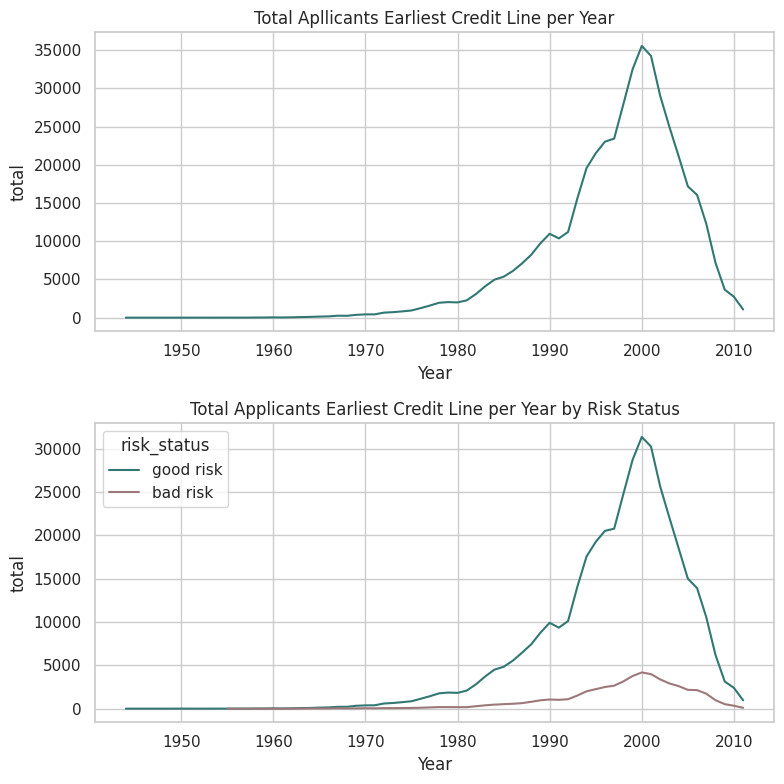

In [ ]:
# visualisasi

fig, ax = plt.subplots(2,1, figsize=(8,8))
sns.set_theme(style = 'whitegrid', context = 'notebook')

# total peminjam yang membuka garis kredit pertama per tahun
sns.lineplot(x='earl_cr_line_yrs', y='total', data=ecl_yrs, color='#317874', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_title('Total Apllicants Earliest Credit Line per Year')

# total peminjam yang membuka garis kredit pertama per tahun berdasarkan target
sns.lineplot(x='earl_cr_line_yrs', y='total', hue='risk_status', data=r_ecl_yrs, palette = ['#317873', '#9d787b'], ax=ax[1])
ax[1].set_xlabel('Year')
ax[1].set_title('Total Applicants Earliest Credit Line per Year by Risk Status')

plt.tight_layout()
plt.show()

**OBservasi:**

Grafik **"Total Apllicants Earliest Credit Line per Year"** menunjukkan tren jumlah peminjam yang membuka garis kredit pertama dari tahun ke tahun. Pada tahun 1980 hingga 2000 jumlah peminjam yang membuka garis kredit pertama meningkat secara signifikan dari sekitar 5000 ke 35000. Hal ini mungkin disebabkan oleh peningkatan kesadaran akan pentingnya memiliki akses ke kredit dan mungkin juga perubahan dalam kebijakan perusahaan yang memungkinkan lebih banyak orang untuk mendapatkan kredit.

Namun, mulai sekitar tahun 2000 hingga 2010, kita melihat penurunan tajam dalam jumlah peminjam yang membuka garis kredit pertama, bahkan mencapai nol pada akhir periode tersebut. Hal ini bisa disebabkan oleh faktor-faktor seperti krisis keuangan global atau perubahan dalam persyaratan pemberian kredit yang membuat lebih sulit bagi orang untuk mendapatkan kredit pertama mereka.

Grafik ***"Total Applicants Earliest Credit Line per Year by Risk Status"*** menunjukkan hubungan yang kuat antara kualitas risiko (*good risk* dan *bad risk*) dengan tren pembukaan garis kredit pertama. Ketika jumlah peminjam dengan risiko baik (*good risk*) meningkat dari waktu ke waktu, jumlah peminjam dengan risiko buruk (*bad risk*) juga cenderung naik. Demikian pula, ketika jumlah peminjam dengan risiko baik turun, jumlah peminjam dengan risiko buruk juga cenderung turun.

In [ ]:
# melihat distribusi dari data jumlah bulan sejak peminjam yang membuka garis kredit pertama

df['mths_since_erl_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-12-31') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))
df['mths_since_erl_cr_line'].describe()

count    466256.000000
mean        227.279936
std          85.352494
min          61.000000
25%         170.000000
50%         211.000000
75%         269.000000
max         860.000000
Name: mths_since_erl_cr_line, dtype: float64

#### `last_pymnt_d`

In [ ]:
# total peminjam yang melakukan pembayaran terakhir per tahun

lp_yrs = df['last_pymnt_d'].dt.year.value_counts().reset_index()
lp_yrs.columns = ['last_pay_yrs', 'total']
lp_yrs['last_pay_yrs']= lp_yrs['last_pay_yrs'].astype(int)
lp_yrs['%'] = round(lp_yrs['total']*100/sum(lp_yrs['total']),2)
lp_yrs

,last_pay_yrs,total,%
0,2016,179620,38.55
1,2015,171344,36.78
2,2014,66595,14.29
3,2013,27194,5.84
4,2012,11813,2.54
5,2011,5748,1.23
6,2010,2420,0.52
7,2009,838,0.18
8,2008,335,0.07
9,2007,2,0.00


In [ ]:
# total peminjam yang melakukan pembayaran terakhir per tahun berdasarkan target

r_lp_yrs = df.groupby([(df['last_pymnt_d'].dt.year), 'risk_status']).size().reset_index()
r_lp_yrs.columns = ['last_pay_yrs', 'risk_status', 'total']
r_lp_yrs['last_pay_yrs']= r_lp_yrs['last_pay_yrs'].astype(int)
r_lp_yrs['%'] = round(r_lp_yrs['total']*100/sum(r_lp_yrs['total']),2)
r_lp_yrs

,last_pay_yrs,risk_status,total,%
0,2007,bad risk,1,0.00
1,2007,good risk,1,0.00
2,2008,bad risk,185,0.04
3,2008,good risk,150,0.03
4,2009,bad risk,389,0.08
5,2009,good risk,449,0.10
6,2010,bad risk,680,0.15
7,2010,good risk,1740,0.37
8,2011,bad risk,1189,0.26
9,2011,good risk,4559,0.98


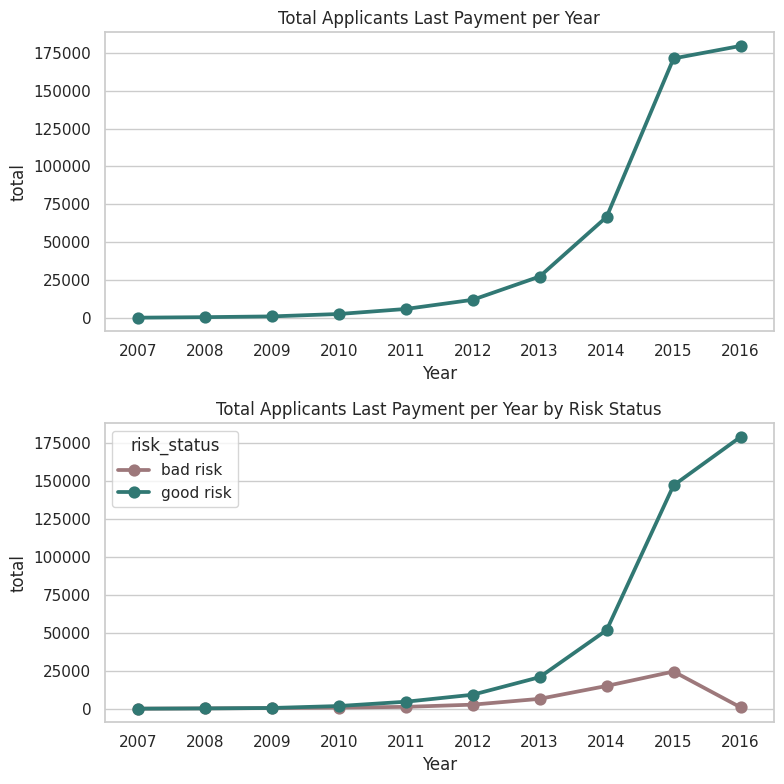

In [ ]:
# visualisasi

fig, ax = plt.subplots(2,1, figsize=(8,8))
sns.set_theme(style = 'whitegrid', context = 'notebook')

# total peminjam yang melakukan pembayaran terakhir per tahun
sns.pointplot(x='last_pay_yrs', y='total', data=lp_yrs, color='#317874', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_title('Total Applicants Last Payment per Year')

# total peminjam yang melakukan pembayaran terakhir per tahun berdasarkan target
sns.pointplot(x='last_pay_yrs', y='total', hue='risk_status', data=r_lp_yrs, palette = ['#9d787b', '#317873'], ax=ax[1])
ax[1].set_xlabel('Year')
ax[1].set_title('Total Applicants Last Payment per Year by Risk Status')

plt.tight_layout()
plt.show()

**Observasi:**

Grafik **"Total Applicants Last Payment per Year"** menunjukkan tren peningkatan jumlah pinjaman dari tahun ke tahun, dengan jumlah pinjaman yang signifikan terjadi pada tahun 2013-2016.

Sementara itu, ketika mempertimbangkan total `last_pymnt_d` berdasarkan status risiko, terlihat bahwa risiko baik mengalami peningkatan dari tahun ke tahun. Sedangkan risiko buruk sempat mengalami penurunan yang cukup signifikan pada tahun 2015.

In [ ]:
# melihat distribusi dari data jumlah bulan sejak peminjam melakulan pembayaran terakhir

df['mths_since_last_pay'] = round(pd.to_numeric((pd.to_datetime('2016-12-31') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))
df['mths_since_last_pay'].describe()

count    465909.000000
mean         20.089966
std          12.463170
min          12.000000
25%          12.000000
50%          13.000000
75%          24.000000
max         107.000000
Name: mths_since_last_pay, dtype: float64

#### `last_credit_pull_d`

In [ ]:
# melihat distribusi dari data jumlah bulan sejak informasi kredit peminjam diperiks

df['mths_since_last_cr_pull'] = round(pd.to_numeric((pd.to_datetime('2016-12-31') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))
df['mths_since_last_cr_pull'].describe()

count    466243.000000
mean         15.951332
std           9.382699
min          12.000000
25%          12.000000
50%          12.000000
75%          14.000000
max         114.000000
Name: mths_since_last_cr_pull, dtype: float64

#### Company Profit

In [ ]:
# membagi df berdasarkan target

bad_df = df[df['risk_status']=='bad risk']
print("ukuran bad_df adalah:", bad_df.shape)

good_df = df[df['risk_status']== 'good risk']
print("ukuran good_df adalah:", good_df.shape)

ukuran bad_df adalah: (52186, 49)
ukuran good_df adalah: (414099, 49)


In [ ]:
pd.options.mode.chained_assignment = None

# menghitung income pada bad risk
bad_df['bad_income'] = bad_df['total_pymnt']+ bad_df['total_rec_prncp']+bad_df['total_rec_int'] - bad_df['total_rec_late_fee']-bad_df['recoveries']-bad_df['collection_recovery_fee']
print("Company Income from applicants with bad risk is: ", bad_df['bad_income'].sum())

# menghitung income pada good risk
good_df['good_income'] = good_df['total_pymnt']+ good_df['total_rec_prncp']+good_df['total_rec_int'] - good_df['total_rec_late_fee']-good_df['recoveries']-good_df['collection_recovery_fee']
print("Company income from applicants with good risk is: ", good_df['good_income'].sum())

Company Income from applicants with bad risk is:  649058269.8467393
Company income from applicants with good risk is:  10029065108.43534


In [ ]:
# menghitung loss pada bad risk
bad_df['bad_loss'] = bad_df['loan_amnt']+bad_df['total_rec_late_fee']-bad_df['total_pymnt']-bad_df['recoveries']-bad_df['collection_recovery_fee']
print("Company Expenses for applicants with bad risk is: ", bad_df['bad_loss'].sum())
# menghitung loss pada good risk
good_df['good_loss'] = good_df['loan_amnt']+good_df['total_rec_late_fee']-good_df['total_pymnt']-good_df['recoveries']-good_df['collection_recovery_fee']
print("Company Expenses for applicangs with good risk is: ", good_df['good_loss'].sum())

Company Expenses for applicants with bad risk is:  352831270.63654065
Company Expenses for applicangs with good risk is:  898181421.5846575


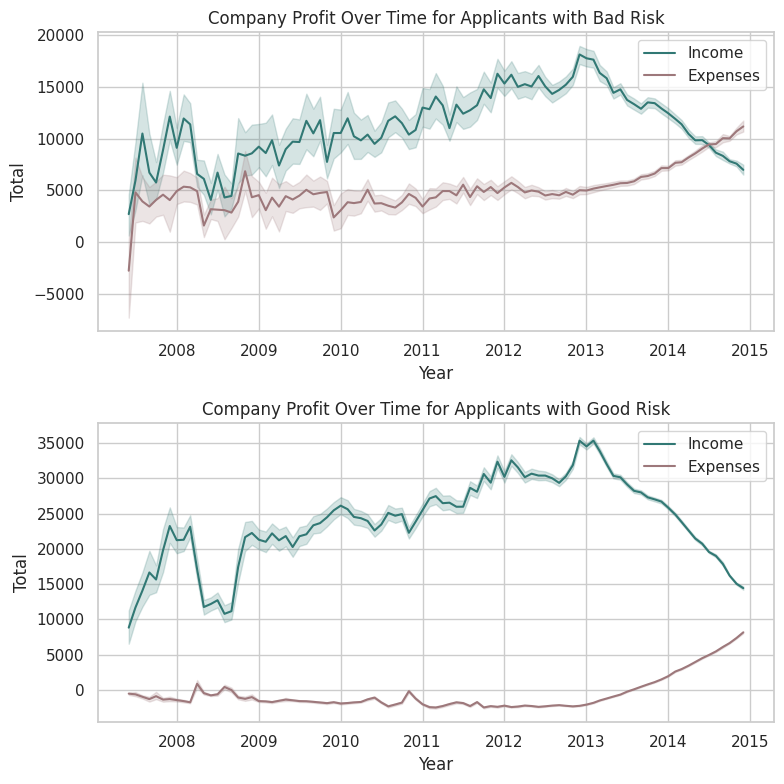

In [ ]:
# visualisasi

fig, ax = plt.subplots(2,1, figsize=(8,8))
sns.set_theme(style = 'whitegrid', context = 'notebook')

# Income vs Expenses per tahun untuk bad risk
sns.lineplot(x='issue_d', y='bad_income', data=bad_df, color='#317874', ax=ax[0], label='Income')
sns.lineplot(x='issue_d', y='bad_loss', data=bad_df, color='#9d787b', ax=ax[0], label='Expenses')
ax[0].set_ylabel('Total')
ax[0].set_xlabel('Year')
ax[0].set_title('Company Profit Over Time for Applicants with Bad Risk')

# Income vs Expenses per tahun untuk good risk
sns.lineplot(x='issue_d', y='good_income', data=good_df, color='#317874', ax=ax[1], label ='Income')
sns.lineplot(x='issue_d', y='good_loss', data=good_df, color='#9d787b', ax=ax[1], label='Expenses')
ax[1].set_ylabel('Total')
ax[1].set_xlabel('Year')
ax[1].set_title('Company Profit Over Time for Applicants with Good Risk')

plt.tight_layout()
plt.show()

**Observasi:**

Perusahaan mencapai profit tertinggi tahun 2013 pada bad risk maupun good risk, sebelum akhirnya mengalami penurunan profit yang signifikan sampai tahun 2015.

In [ ]:
# menghapus kolom yang sudah direpresentasikan kolom baru
df=df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)

## Data Cleansing

### Duplicated Data Check

In [ ]:
df.duplicated().sum()

0

### Missing Value Check

In [ ]:
# menghitung jumlah missing values setiap kolom dalam percent

null_percent = df.isnull().sum()/len(df)
null_percent.sort_values(ascending=False)

mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
mths_since_last_delinq         0.536906
next_pymnt_d                   0.487286
total_rev_hi_lim               0.150715
tot_cur_bal                    0.150715
tot_coll_amt                   0.150715
emp_length                     0.045054
mths_since_last_pay            0.000806
revol_util                     0.000729
collections_12_mths_ex_med     0.000311
mths_since_last_cr_pull        0.000090
total_acc                      0.000062
pub_rec                        0.000062
open_acc                       0.000062
delinq_2yrs                    0.000062
inq_last_6mths                 0.000062
acc_now_delinq                 0.000062
mths_since_erl_cr_line         0.000062
annual_inc                     0.000009
total_rec_int                  0.000000
risk_status                    0.000000
mths_since_issue_d             0.000000
last_pymnt_amnt                0.000000
collection_recovery_fee        0.000000


In [ ]:
# Memisahkan kolom yang memiliki null values lebih dari 40% dan kurang dari 40%

null_percent_over_40 = null_percent[null_percent > 0.4].index
null_percent_under_40 = null_percent[null_percent <= 0.4].index

In [ ]:
# drop kolom yang memiliki null values lebih dari 40%

df.drop(columns = null_percent_over_40, inplace=True)

In [ ]:
# Mengisi kolom kategori yang memiliki null values kurang dari 40% dengan modus

null_cat_columns = df[null_percent_under_40].select_dtypes(include='object').columns

for col in null_cat_columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

In [ ]:
# Mengisi kolom numerik yang memiliki null values kurang dari 40% dengan median

null_num_columns = df[null_percent_under_40].select_dtypes(exclude='object').columns

for col in null_num_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

In [ ]:
# recheck missing values

df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collecti

# Data Modelling

## Encoding

In [ ]:
df['risk_status'] = np.where(df['risk_status'].isin(['bad risk']), 1, 0)

### Label Encoding

In [ ]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
# Melakukan label encoding untuk `term`
le.fit(df['term'])
df['term_le'] = le.transform(df['term'])

In [ ]:
# menampilkan hasil encoding 'term'

df[['term','term_le']].drop_duplicates()

,term,term_le
0,36 months,0
1,60 months,1


In [ ]:
# Melakukan label encoding untuk `term`
le.fit(df['initial_list_status'])
df['initial_list_status_le'] = le.transform(df['initial_list_status'])

In [ ]:
# menampilkan hasil encoding 'term'

df[['initial_list_status','initial_list_status_le']].drop_duplicates()

,initial_list_status,initial_list_status_le
0,f,0
42535,w,1


In [ ]:
# menghapus kolom sebelum di encode
df.drop(['term', 'initial_list_status'], axis=1, inplace=True)

### Ordinal Encoding

`grade` memiliki urutan yang bermakna ('A' < 'B' < ... < 'G'). Begitupun pada `emp_length`. Oleh karena itu, ordinal encoding adalah pilihan yang tepat di sini.

In [ ]:
# Membuat dictionary encoding untuk masing-masing kolom
encoding_map = {'grade' : {'A':6,'B':5,'C':4,'D':3,'E':2,'F':1,'G':0},
'emp_length' : {'< 1 year' :0,'1 year':1,
         '2 years':2,'3 years':3,'4 years':4,
        '5 years':5,'6 years':6,'7 years':7,
        '8 years':8,'9 years':9,'10+ years':10}
}

# Melakukan encoding manual
ord_encoded = df.copy()
for column, mapping in encoding_map.items():
    ord_encoded[column] = df[column].map(mapping)

# Menghapus semua kolom kecuali 'grade' dan 'emp_length'
ord_encoded.drop(ord_encoded.columns.difference(['grade', 'emp_length']), axis=1, inplace=True)
ord_encoded.head()

,grade,emp_length
0,5,10
1,4,0
2,4,10
3,4,10
4,5,1


In [ ]:
# menampilkan hasil encoding 'grade'

pd.concat([df['grade'], ord_encoded['grade']], axis=1).drop_duplicates()

,grade,grade
0,B,5
1,C,4
5,A,6
7,E,2
8,F,1
15,D,3
223,G,0


In [ ]:
# menampilkan hasil encoding 'emp_length'

pd.concat([df['emp_length'], ord_encoded['emp_length']], axis=1).drop_duplicates()

,emp_length,emp_length
0,10+ years,10
1,< 1 year,0
4,1 year,1
5,3 years,3
6,8 years,8
7,9 years,9
8,4 years,4
10,5 years,5
19,6 years,6
25,2 years,2


### One hot Encoding

`verification_status` dan `purpose` adalah fitur yang tidak memiliki urutan yang bermakna. Jadi, one-hot encoding adalah pilihan yang baik.

Selain itu, `home_ownership` juga menggunakan one-hot encoding. Meskipun kategori-kategori seperti 'OWN', 'RENT', 'MORTGAGE', 'OTHER' memiliki beberapa urutan implisit, mereka tidak memiliki urutan yang bermakna seperti pada kasus ordinal encoding. Sehingga, one-hot encoding adalah pendekatan yang lebih tepat untuk mengkodekan fitur 'home_ownership'.

In [ ]:
# kolom yang akan menggunakan one hot encoding
to_ohe = ['home_ownership', 'verification_status', 'purpose']

# one hot encoding
onehot = pd.get_dummies(df[to_ohe], dtype=int, drop_first=True)
onehot.head()

,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Transformed Dataframe

In [ ]:
# memilih df numerik
df_num = df.select_dtypes(exclude='object')

# membuat dataframe baru untuk modelling

df_model = pd.concat([df_num, ord_encoded,onehot], axis=1)
df_model.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,...,0,0,0,0,0,0,0,1,0,0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,0,0,0,0,0,1,0,0,0,0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   funded_amnt                          466285 non-null  int64  
 2   funded_amnt_inv                      466285 non-null  float64
 3   int_rate                             466285 non-null  float64
 4   installment                          466285 non-null  float64
 5   annual_inc                           466285 non-null  float64
 6   dti                                  466285 non-null  float64
 7   delinq_2yrs                          466285 non-null  float64
 8   inq_last_6mths                       466285 non-null  float64
 9   open_acc                             466285 non-null  float64
 10  pub_rec                              466285 non-null  float64
 11  revol_bal    

## Feature Selection

In [ ]:
def corr (df, threshold):
  corr_cols = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)) :
      for j in range(i):
          if abs(corr_matrix.iloc[i,j]) > threshold :
              colname = corr_matrix.columns[i]
              corr_cols.add(colname)
  return corr_cols

In [ ]:
df_model.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
loan_amnt,1.000000,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,0.006869,-0.020269,0.204189,...,-0.012040,0.005423,-0.067697,-0.065857,-0.065651,-0.133942,-0.014209,0.014860,-0.072818,-0.032982
funded_amnt,0.998548,1.000000,0.996125,0.167921,0.951787,0.370311,0.058673,0.007414,-0.020910,0.204991,...,-0.012441,0.005084,-0.068120,-0.065960,-0.065770,-0.134355,-0.014348,0.012993,-0.072813,-0.033368
funded_amnt_inv,0.994347,0.996125,1.000000,0.169353,0.947387,0.367805,0.062606,0.008178,-0.027503,0.205814,...,-0.012969,0.004293,-0.068349,-0.065934,-0.065692,-0.135467,-0.014850,0.007130,-0.072367,-0.035172
int_rate,0.167183,0.167921,0.169353,1.000000,0.148790,-0.046069,0.159657,0.079209,0.205677,0.012321,...,-0.014484,0.022931,-0.033666,0.032901,0.040652,0.097697,0.007958,0.061103,0.020642,0.005214
installment,0.949666,0.951787,0.947387,0.148790,1.000000,0.368145,0.049919,0.017028,0.002305,0.196847,...,-0.019310,0.007574,-0.069825,-0.062402,-0.061309,-0.124220,-0.012688,0.024884,-0.070165,-0.029504
annual_inc,0.370893,0.370311,0.367805,-0.046069,0.368145,1.000000,-0.188542,0.058895,0.056674,0.157778,...,0.069228,0.007972,0.001981,0.000830,-0.009558,-0.020532,0.003340,0.029900,-0.010438,-0.004946
dti,0.057319,0.058673,0.062606,0.159657,0.049919,-0.188542,1.000000,-0.003667,-0.012485,0.303914,...,-0.085872,-0.036069,-0.067350,-0.016477,-0.021747,-0.042993,-0.009991,-0.061623,-0.011345,-0.029263
delinq_2yrs,0.006869,0.007414,0.008178,0.079209,0.017028,0.058895,-0.003667,1.000000,0.018001,0.059139,...,0.017890,0.001202,-0.000930,0.005904,0.001338,0.005320,-0.001953,0.000391,-0.000072,-0.004373
inq_last_6mths,-0.020269,-0.020910,-0.027503,0.205677,0.002305,0.056674,-0.012485,0.018001,1.000000,0.092797,...,0.052450,0.034053,0.018471,0.008264,0.010128,0.018160,0.002762,0.035862,0.005630,0.011548
open_acc,0.204189,0.204991,0.205814,0.012321,0.196847,0.157778,0.303914,0.059139,0.092797,1.000000,...,-0.023226,-0.014974,-0.043506,-0.016963,-0.023580,-0.059723,-0.005811,-0.036020,-0.018532,-0.021493


In [ ]:
# menampilkan salah satu kolom yang mempunyai korelasi > 0.7

corr_features_p = corr(df_model, 0.7)
corr_features_p

{'collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'installment',
 'last_pymnt_amnt',
 'mths_since_last_cr_pull',
 'mths_since_last_pay',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim'}

In [ ]:
#df_model = df_model.drop(labels=corr_features_p, axis=1)

## Standardization

In [ ]:
X = df_model.drop(['risk_status'], axis=1)
y = df_model['risk_status']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X= pd.DataFrame(X, columns=df_model.drop(['risk_status'], axis=1).columns)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,-1.124392,-1.122963,-1.114455,-0.729587,-1.105575,-0.896549,1.328632,-0.357012,0.178920,-1.641544,...,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065
1,-1.426088,-1.425101,-1.412732,0.330634,-1.528763,-0.787386,-2.065791,-0.357012,3.843328,-1.641544,...,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,-0.123571,-0.073227,-0.071065
2,-1.438156,-1.437186,-1.424784,0.488979,-1.428140,-1.110292,-1.082491,-0.357012,1.095022,-1.842050,...,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,-0.231355,-0.027447,8.092507,-0.073227,-0.071065
3,-0.521001,-0.518687,-0.508860,-0.077850,-0.380931,-0.438061,0.354248,-0.357012,0.178920,-0.238000,...,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,4.322358,-0.027447,-0.123571,-0.073227,-0.071065
4,-1.365749,-1.364673,-1.352474,-0.261438,-1.496071,0.122313,0.091865,-0.357012,-0.737182,0.764532,...,-0.245654,-0.069928,-0.146735,-0.099839,-0.080389,4.322358,-0.027447,-0.123571,-0.073227,-0.071065


## Train-Test Split

In [ ]:
from imblearn import over_sampling

# handling imbalanced dataset

X, y = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Modelling

In [ ]:
# report

from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, accuracy_score, confusion_matrix
def report(model, y_test, y_pred, model_name):
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results = pd.DataFrame({'model': [model_name],
                           'recall': [recall],
                           'precision':[precision],
                           'accuracy':[accuracy],
                           'f1':[f1]})

    return results

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# train the model
model = 'Logistic Regression'
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# predict data train
y_train_pred = logreg.predict(X_train)

#predict data test
y_test_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# report for train data

logreg_train_report = report(logreg, y_train, y_train_pred, model)
logreg_train_report

,model,recall,precision,accuracy,f1
0,Logistic Regression,0.884647,0.981706,0.934107,0.930653


In [ ]:
# report for test data

logreg_test_report = report(logreg, y_test, y_test_pred, model)
logreg_test_report

,model,recall,precision,accuracy,f1
0,Logistic Regression,0.885041,0.981117,0.933899,0.930605


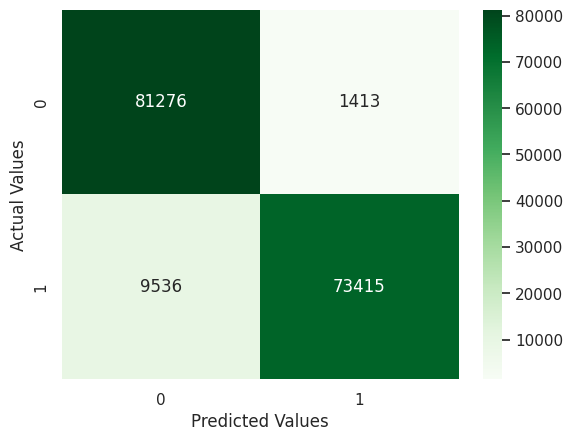

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Observasi:**

Dari confusion matrix pada test data, kita bisa melihat bahwa jumlah false negative (FN) atau kasus yang seharusnya bad risk tetapi diprediksi good risk adalah 9676. Ini menunjukkan bahwa model cenderung melewatkan banyak kasus risiko buruk.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train the model
model = 'Random Forest'
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# predict data train
y_train_pred = rfc.predict(X_train)

#predict data test
y_test_pred = rfc.predict(X_test)

In [ ]:
# report for train data

rfc_train_report = report(rfc, y_train, y_train_pred, model)
rfc_train_report

,model,recall,precision,accuracy,f1
0,Random Forest,0.999997,1.0,0.999998,0.999998


In [ ]:
# report for test data

rfc_test_report = report(rfc, y_test, y_test_pred, model)
rfc_test_report

,model,recall,precision,accuracy,f1
0,Random Forest,0.992236,0.999478,0.995852,0.995844


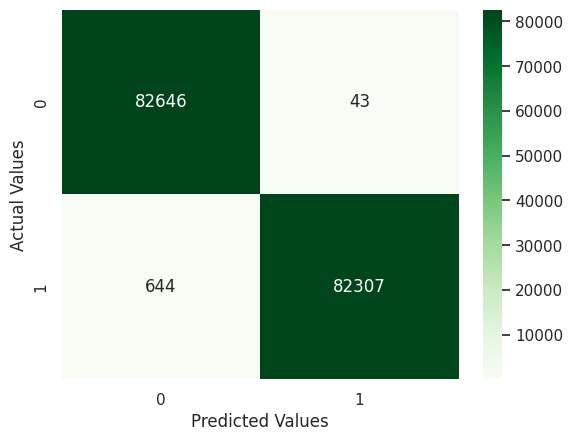

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Observasi:**

Dari confusion matrix pada test data, kita bisa melihat bahwa jumlah false negative (FN) atau kasus yang seharusnya bad risk tetapi diprediksi good risk adalah 646. Ini menunjukkan bahwa model masih melewatkan banyak kasus risiko buruk, namun jauh lebih baik daripada model Logistic Regression.

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# train the model
model = 'XGBoost Classifier'
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# predict data train
y_train_pred = xgb.predict(X_train)

#predict data test
y_test_pred = xgb.predict(X_test)

In [ ]:
# report for train data

xgb_train_report = report(xgb, y_train, y_train_pred, model)
xgb_train_report

,model,recall,precision,accuracy,f1
0,XGBoost Classifier,0.994027,0.999921,0.996975,0.996965


In [ ]:
# report for test data

xgb_test_report = report(xgb, y_test, y_test_pred, model)
xgb_test_report

,model,recall,precision,accuracy,f1
0,XGBoost Classifier,0.99267,0.999612,0.996136,0.996129


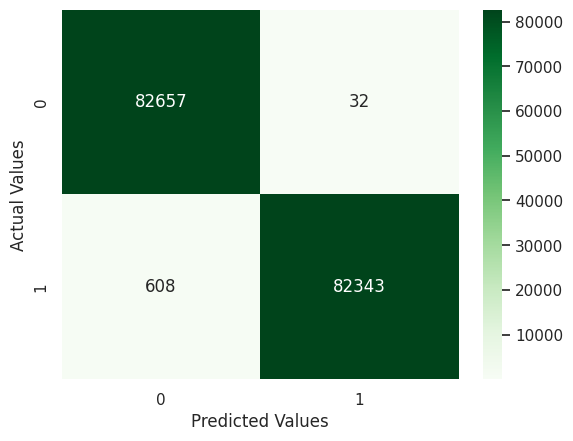

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Observasi:**

Dari confusion matrix pada test data, kita bisa melihat bahwa jumlah false negative (FN) atau kasus yang seharusnya bad risk tetapi diprediksi good risk adalah 628. Hal ini menunjukkan bahwa XGBoost Classifier lebih baik daripada Random Forest walaupun tidak terdapat perbedaan yang signifikan.

### Metric Evaluation

In [ ]:
# result
result = pd.concat([logreg_test_report,rfc_test_report, xgb_test_report])
result

,model,recall,precision,accuracy,f1
0,Logistic Regression,0.885041,0.981117,0.933899,0.930605
0,Random Forest,0.992236,0.999478,0.995852,0.995844
0,XGBoost Classifier,0.992670,0.999612,0.996136,0.996129


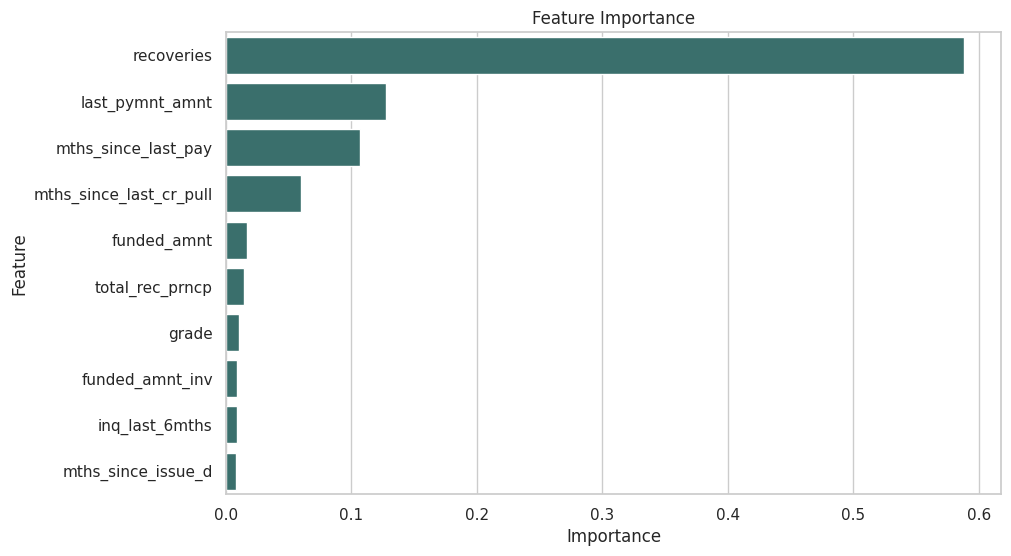

In [ ]:
# feature importance

feature_importance = xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':X.columns, 'Importance': feature_importance})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features, color='#317874')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Feature Importance")
plt.show()

### Conclusion

1. XGBoost Classifier merupakan model terbaik untuk memprediksi risiko kredit peminjam. Model ini berhasil mengidentifikasi 99% peminjam yang berisiko gagal membayar (recall) dan 99% dari peminjam yang diidentifikasi berisiko gagal membayar adalah benar-benar gagal membayar (precision).
2. Dengan model XGBoost Classifier, terdapat 10 fitur penting untuk memprediksi peminjam yang berisiko gagal bayar untuk menjadi bahan pertimbangan perusahaan dalam mengambil keputusan pinjaman, yaitu: `recoveries`, `last_pymnt_amnt`, `mths_since_last_pay`, `mths_since_last_cr_pull`, `grade`, `total_rec_prncp`, `inq_last_6mths`, `mths_since_issue_d`, `funded_amnt` dan `total_rec_late_fee`.